In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install openpyxl

In [3]:
data=pd.read_excel("1000 leads.xlsx")

print(data.shape)
data.head()

(1001, 4)


Lead Name   Location        Status   \
0           Raja  hyderabad  Not Converted   
1  Anirudh Reddy       pune  Not Converted   
2   Sapna Dewani  bangalore     Converted    
3         suresh     mumbai  Not Converted   
4  Akshay Shinde  hyderabad  Not Converted   

                                  Status information  
0  14/8/prema: share me details, available in evn...  
1  14/8/prema: cal me tmrw, shared details to ema...  
2                                   16|AuG|moHan:rnr  
3  14/8/17(Surendra):i want only Server 16|AuG|mo...  
4  14/8/prema:rnr 16/8/prema: gave info, he said ...

In [4]:
df= data.copy(deep=True)

In [5]:
df.rename(columns={'Status ': 'target', 'Status information': 'text'}, inplace= True)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Lead Name  1001 non-null   object
 1   Location   980 non-null    object
 2   target     998 non-null    object
 3   text       977 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


In [7]:
df.isnull().sum()

Lead Name     0
Location     21
target        3
text         24
dtype: int64

In [8]:
# obtaining indexes where either text or target is null

df_subset = df[df['text'].isnull() | df['target'].isnull()]
indexes = df_subset.index

In [9]:
# keeping only those rows where text and target both are avaialable

df.drop(index=list(indexes),inplace=True)
df

Lead Name   Location         target  \
0                    Raja  hyderabad  Not Converted   
1           Anirudh Reddy       pune  Not Converted   
2            Sapna Dewani  bangalore     Converted    
3                  suresh     mumbai  Not Converted   
4           Akshay Shinde  hyderabad  Not Converted   
...                   ...        ...            ...   
996                 vipin  bangalore  Not Converted   
997               dheeraj    chennai  Not Converted   
998         kuldeep singh  bangalore  Not Converted   
999          ankur sharma  bangalore  Not Converted   
1000  Saugata Chakrabarti  bangalore  Not Converted   

                                                   text  
0     14/8/prema: share me details, available in evn...  
1     14/8/prema: cal me tmrw, shared details to ema...  
2                                      16|AuG|moHan:rnr  
3     14/8/17(Surendra):i want only Server 16|AuG|mo...  
4     14/8/prema:rnr 16/8/prema: gave info, he said ...  
...                                                 ...  
996   25/4/17(Surendra):please send me details tomor...  
997   24/4/17(prema): need CT, but our venue is far....  
998   24/Apr/moHan:intrstd in evng batch trail perd ...  
999   1/5/17(Surendra):please share me details 11/5/...  
1000  24/4/17(prema): shared details need only Cert....  

[974 rows x 4 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Lead Name  974 non-null    object
 1   Location   956 non-null    object
 2   target     974 non-null    object
 3   text       974 non-null    object
dtypes: object(4)
memory usage: 38.0+ KB


In [11]:
df.duplicated().sum()

0

In [12]:
df.reset_index(drop='first',inplace=True)

## <u>Data Cleaning & EDA:</u>

In [13]:
import warnings 
warnings.filterwarnings('ignore')

In [14]:
#there were some unnecessary spaces at end in the data.

df['target'] = df['target'].str.strip()

In [15]:
df['target'].value_counts()

target
Not Converted    834
Converted        122
NOt Converted     11
Conveted           7
Name: count, dtype: int64

In [16]:
# Renaming values in the 'target' column from 'NOt Converted' to 'Not Converted'and from 'Conveted' to 'Converted'

df['target']=df['target'].replace(['NOt Converted','Conveted'],['Not Converted','Converted'])
df['target'].value_counts()

target
Not Converted    845
Converted        129
Name: count, dtype: int64

__Problems__ with location column

- same city name with different casing
- spelling mistakes
- too many categories
- missing data


In [17]:
#filling NaN value in location with a randomly sampled data value from the column itself.

df["Location"][df["Location"].isnull()] = df["Location"].dropna().sample(df['Location'].isnull().sum()).values

In [18]:
df["Location"]=df["Location"].str.lower()

In [19]:
#taking 1st 4 letter of location as there are spelling mistakes.

for i in range(0,df.shape[0]):
    df["Location"].iloc[i] = df["Location"].iloc[i][:4]
df["Location"]

0      hyde
1      pune
2      bang
3      mumb
4      hyde
       ... 
969    bang
970    chen
971    bang
972    bang
973    bang
Name: Location, Length: 974, dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Lead Name  974 non-null    object
 1   Location   974 non-null    object
 2   target     974 non-null    object
 3   text       974 non-null    object
dtypes: object(4)
memory usage: 30.6+ KB


In [21]:
# number of unique categories in lead name and Location column

print("Catgories in Location column: ",df['Location'].nunique())
print("Catgories in Lead name column: ",df['Lead Name'].nunique())

Catgories in Location column:  44
Catgories in Lead name column:  856


In [22]:
# Using onehot encoder to transform categorical columns


In [23]:
#Initializing OneHotEncoders for 'Location' and 'Lead' features

from sklearn.preprocessing import OneHotEncoder
ohe_location = OneHotEncoder(drop='first',sparse=False,dtype=np.int8)
ohe_lead = OneHotEncoder(drop='first',sparse=False,dtype=np.int8)

In [24]:
# One-hot encode the 'Location' feature, creating a DataFrame, and then displaying the first 3 rows.

pd.set_option('display.max_columns',None)
ohe_matrix_location = ohe_location.fit_transform(df[["Location"]])
column_names_location = ohe_location.get_feature_names_out(input_features=["Location"])
ohe_df_location = pd.DataFrame(ohe_matrix_location, columns=column_names_location)
ohe_df_location.head(3)

Location_aura  Location_aust  Location_bang  Location_biha  Location_bilg  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   

   Location_chen  Location_coim  Location_delh  Location_fari  Location_ghaz  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   

   Location_guja  Location_gunt  Location_gurg  Location_hubl  Location_hyde  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              0   

   Location_indi  Location_jaip  Location_jala  Location_kada  Location_kera  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   

   Location_kham  Location_koch  Location_kolk  Location_madu  Location_meer  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   

   Location_mumb  Location_myso  Location_nagp  Location_nasi  Location_nepa  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   

   Location_noid  Location_ongo  Location_onli  Location_pune  Location_raja  \
0              0              0              0              0              0   
1              0              0              0              1              0   
2              0              0              0              0              0   

   Location_raya  Location_sola  Location_than  Location_tiru  Location_uae  \
0              0              0              0              0             0   
1              0              0              0              0             0   
2              0              0              0              0             0   

   Location_usa  Location_vija  Location_vish  
0             0              0              0  
1             0              0              0  
2             0              0              0

In [25]:
# One-hot encode the 'Lead Name' feature, creating a DataFrame, and then displaying the first 3 rows.

ohe_matrix_lead = ohe_lead.fit_transform(df[["Lead Name"]])
column_names_lead = ohe_lead.get_feature_names_out(input_features=["Lead Name"])
ohe_df_lead = pd.DataFrame(ohe_matrix_lead, columns=column_names_lead)
ohe_df_lead.head(3)

Lead Name_AMIT JAIN  Lead Name_ASHUTOSH MUDGAL  Lead Name_Aasawari Yadav  \
0                    0                          0                         0   
1                    0                          0                         0   
2                    0                          0                         0   

   Lead Name_Abdul  Lead Name_Abdul Rashid Khan  Lead Name_Abdul Sattar  \
0                0                            0                       0   
1                0                            0                       0   
2                0                            0                       0   

   Lead Name_Abdulrahman  Lead Name_Abdulrazak  Lead Name_Abhijit Garnayak  \
0                      0                     0                           0   
1                      0                     0                           0   
2                      0                     0                           0   

   Lead Name_Abhinav  Lead Name_Abhinav Gupta  Lead Name_Abhishek  \
0                  0                        0                   0   
1                  0                        0                   0   
2                  0                        0                   0   

   Lead Name_Aditya  Lead Name_Advaitha  Lead Name_Aiswarya  Lead Name_Ajay  \
0                 0                   0                   0               0   
1                 0                   0                   0               0   
2                 0                   0                   0               0   

   Lead Name_Ajaya  Lead Name_Ajinkya  Lead Name_Ajith Pal Singh  \
0                0                  0                          0   
1                0                  0                          0   
2                0                  0                          0   

   Lead Name_Akansha  Lead Name_Akansha Kumari  Lead Name_Akash Jain  \
0                  0                         0                     0   
1                  0                         0                     0   
2                  0                         0                     0   

   Lead Name_Akhil  Lead Name_Aksah  Lead Name_Akshay  \
0                0                0                 0   
1                0                0                 0   
2                0                0                 0   

   Lead Name_Akshay Mathad  Lead Name_Akshay Mittal  Lead Name_Akshay Shinde  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   

   Lead Name_Akshaya  Lead Name_Akshaya Kumar  Lead Name_Alekhya  \
0                  0                        0                  0   
1                  0                        0                  0   
2                  0                        0                  0   

   Lead Name_Alok Kumar  Lead Name_Amal Thomas  Lead Name_Amam  \
0                     0                      0               0   
1                     0                      0               0   
2                     0                      0               0   

   Lead Name_Ameya  Lead Name_Amish  Lead Name_Amit  Lead Name_Amit Arora  \
0                0                0               0                     0   
1                0                0               0                     0   
2                0                0               0                     0   

   Lead Name_Amit Kumar Jaiswa  Lead Name_Amit Verma  Lead Name_Amiya Kumar  \
0                            0                     0                      0   
1                            0                     0                      0   
2                            0                     0                      0   

   Lead Name_Amol Badgujar  Lead Name_Anamika  Lead Name_Anand  \
0                        0                  0                0   
1                        0                  0                0   
2   

In [26]:
# Size of leadname matrix is quite high. Including this in model building can lead to high dimensionality of data.
#Although we can cConsider dimensionality reduction techniques or feature selection methods for more effective modelig.

In [27]:
# Manually converting the target to binary

df['target'] = df['target'].replace({'Converted':1,'Not Converted':0})

In [28]:
df.head(5)

Lead Name Location  target  \
0           Raja     hyde       0   
1  Anirudh Reddy     pune       0   
2   Sapna Dewani     bang       1   
3         suresh     mumb       0   
4  Akshay Shinde     hyde       0   

                                                text  
0  14/8/prema: share me details, available in evn...  
1  14/8/prema: cal me tmrw, shared details to ema...  
2                                   16|AuG|moHan:rnr  
3  14/8/17(Surendra):i want only Server 16|AuG|mo...  
4  14/8/prema:rnr 16/8/prema: gave info, he said ...

In [29]:
# 1:Converted and 0 :Not Converted

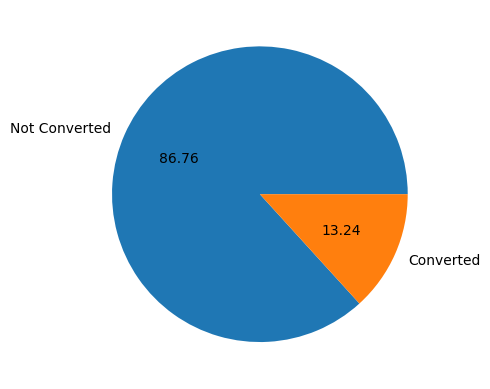

In [30]:
# Create a pie chart to visualize the distribution of 'target' categories.

plt.pie(df.target.value_counts(),labels=['Not Converted','Converted' ],autopct="%0.2f")
plt.show()

In [31]:
#creating a new column with number of alphbets in chat

df['num_characters'] = df.text.apply(len)
df.head()

Lead Name Location  target  \
0           Raja     hyde       0   
1  Anirudh Reddy     pune       0   
2   Sapna Dewani     bang       1   
3         suresh     mumb       0   
4  Akshay Shinde     hyde       0   

                                                text  num_characters  
0  14/8/prema: share me details, available in evn...             133  
1  14/8/prema: cal me tmrw, shared details to ema...             171  
2                                   16|AuG|moHan:rnr              16  
3  14/8/17(Surendra):i want only Server 16|AuG|mo...              86  
4  14/8/prema:rnr 16/8/prema: gave info, he said ...             118

In [32]:
#!pip install nltk

In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRASHANT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
# Creating column for number of words
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

### Understanding statisctics of above data

In [35]:
df[['num_characters','num_words']].describe()

num_characters   num_words
count      974.000000  974.000000
mean       140.607803   32.072895
std         96.653662   23.188397
min          9.000000    2.000000
25%         70.000000   16.000000
50%        120.000000   27.000000
75%        188.000000   43.000000
max        797.000000  182.000000

In [36]:
stats =df[['target','num_characters','num_words']]
stats.head()

target  num_characters  num_words
0       0             133         22
1       0             171         33
2       1              16          3
3       0              86         18
4       0             118         24

In [37]:
stats[stats.target==0].describe()

target  num_characters   num_words
count   845.0      845.000000  845.000000
mean      0.0      140.969231   32.191716
std       0.0       94.874744   22.959653
min       0.0        9.000000    2.000000
25%       0.0       70.000000   16.000000
50%       0.0      122.000000   27.000000
75%       0.0      189.000000   44.000000
max       0.0      797.000000  182.000000

In [38]:
stats[stats.target==1].describe() #target converted

target  num_characters   num_words
count   129.0      129.000000  129.000000
mean      1.0      138.240310   31.294574
std       0.0      107.958237   24.714432
min       1.0        9.000000    2.000000
25%       1.0       66.000000   15.000000
50%       1.0      108.000000   24.000000
75%       1.0      177.000000   41.000000
max       1.0      692.000000  137.000000

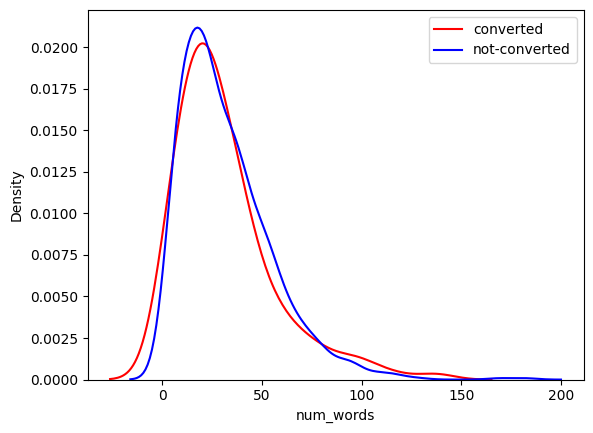

In [39]:
#graph for num of characters
sns.kdeplot(stats[stats['target']==1]['num_words'],color='red',label ='converted')
sns.kdeplot(stats[stats['target']==0]['num_words'],color='blue',label ='not-converted')
plt.legend()
plt.show()

**Observation : Nothing much could be inferred from above graph had there been any differnce in kde plot we could have inferred some important findings from it.**

#### DATA PRE PROCESSING

In [40]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import nltk
from nltk.tokenize import word_tokenize
import contractions

In [41]:
#!pip install contractions


In [42]:
# using contraction library to tackle abbrevations in the chat.

def remove_abb(data):
    sent= contractions.fix(data)
    return sent

In [43]:
# function to remove dates from the chat

def removal_dates(text):
    
    t1= re.sub('\d{2}/\d{1}/[a-z]{5}'," ",text)
    t2=re.sub('^\d{1,2}\|\w{3}\|\w{5}$'," ",t1)
    t3 = re.sub('^\d{1,2}/\d{1,2}/\d{2}\([A-Za-z]+\)$'," ",t2)
    return t3

In [44]:
# Preprocesses the input text by performing the following steps:
#1. Convert text to lowercase.
#2. Tokenize the text.
#3. Remove non-alphanumeric characters.
#4. Remove stopwords and punctuation.
#5. Apply stemming using PorterStemmer.

def preprocess_all(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [45]:
#nltk.download('stopwords')

In [46]:
# obtaining the final transformed data to work with.

df['transformed_text'] = df.text.apply(preprocess_all)
df['transformed_text'] = df['transformed_text'].apply(remove_abb)
df['transformed_text'] = df['transformed_text'].apply(removal_dates)
df['transformed_text']

0      share detail avail evng postpon plan train cur...
1      cal tomorrow share detail email share detail e...
2                                                    rnr
3               surendra want server cal busi reg server
4      rnr gave info said revert 1hr plan next month ...
                             ...                        
969    surendra pleas send detail tomorrow afternoon ...
970    prema need ct venu far share detail ds prema w...
971         intrstd evng batch trail perd alrdi reg exlr
972     surendra pleas share detail gowtham alreadi done
973    prema share detail need cert prema need call 4...
Name: transformed_text, Length: 974, dtype: object

In [47]:
df.head()

Lead Name Location  target  \
0           Raja     hyde       0   
1  Anirudh Reddy     pune       0   
2   Sapna Dewani     bang       1   
3         suresh     mumb       0   
4  Akshay Shinde     hyde       0   

                                                text  num_characters  \
0  14/8/prema: share me details, available in evn...             133   
1  14/8/prema: cal me tmrw, shared details to ema...             171   
2                                   16|AuG|moHan:rnr              16   
3  14/8/17(Surendra):i want only Server 16|AuG|mo...              86   
4  14/8/prema:rnr 16/8/prema: gave info, he said ...             118   

   num_words                                   transformed_text  
0         22  share detail avail evng postpon plan train cur...  
1         33  cal tomorrow share detail email share detail e...  
2          3                                                rnr  
3         18           surendra want server cal busi reg server  
4         24  rnr gave info said revert 1hr plan next month ...

### <u>Creating WORDCLOD for both the status</u>

In [48]:
#! pip install wordcloud

In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=600,height=600,min_font_size=10,background_color='white')

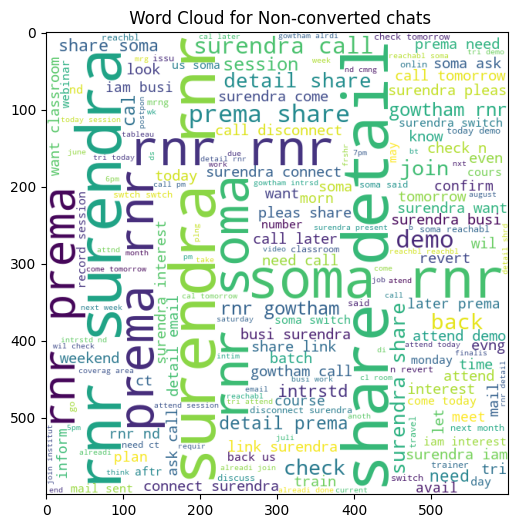

In [50]:
notconverted = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")) #target not-converted
plt.figure(figsize=(15,6))
plt.title(" Word Cloud for Non-converted chats")
plt.imshow(notconverted)
plt.show()


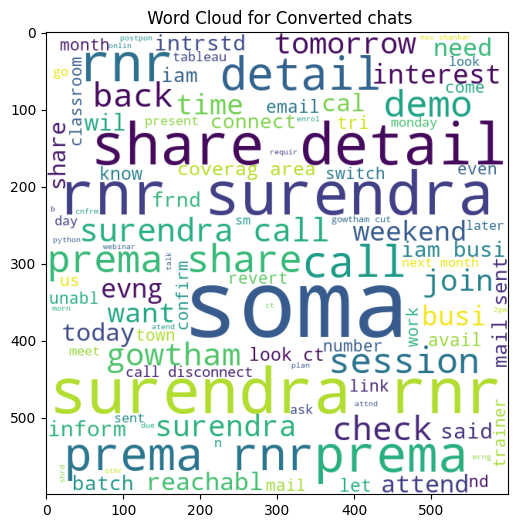

In [51]:
con = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) #target converted
plt.figure(figsize=(15,6))
plt.title(" Word Cloud for Converted chats")
plt.imshow(con)
plt.show()

In [52]:
df.head()

Lead Name Location  target  \
0           Raja     hyde       0   
1  Anirudh Reddy     pune       0   
2   Sapna Dewani     bang       1   
3         suresh     mumb       0   
4  Akshay Shinde     hyde       0   

                                                text  num_characters  \
0  14/8/prema: share me details, available in evn...             133   
1  14/8/prema: cal me tmrw, shared details to ema...             171   
2                                   16|AuG|moHan:rnr              16   
3  14/8/17(Surendra):i want only Server 16|AuG|mo...              86   
4  14/8/prema:rnr 16/8/prema: gave info, he said ...             118   

   num_words                                   transformed_text  
0         22  share detail avail evng postpon plan train cur...  
1         33  cal tomorrow share detail email share detail e...  
2          3                                                rnr  
3         18           surendra want server cal busi reg server  
4         24  rnr gave info said revert 1hr plan next month ...

# <u>Model Building </u>

- Method1: we can upsample the minority class and form a new dataset to train the model. In this case accuracy score can be used as evaluation metric.
- Method2: We can train the entire data sample and recall as main criteria and with an acceptable precision we can build model.


### 1. <u>Using Method 1 Where We Will Use The Entire Data Set As It Is And With Recall And F1 Score as Main Criteria For Eavaluting models performance.</u>

**Approach 1 : Using word2vec to form vectors of text data**

**A. Creating Vectors:**

In [53]:
#!pip install gensim

In [54]:
#using Gensim’s simple_preprocess function to tokenize the text data

import gensim
df['tokens'] = df['transformed_text'].apply(lambda x: gensim.utils.simple_preprocess(x))
df.head(3)

Lead Name Location  target  \
0           Raja     hyde       0   
1  Anirudh Reddy     pune       0   
2   Sapna Dewani     bang       1   

                                                text  num_characters  \
0  14/8/prema: share me details, available in evn...             133   
1  14/8/prema: cal me tmrw, shared details to ema...             171   
2                                   16|AuG|moHan:rnr              16   

   num_words                                   transformed_text  \
0         22  share detail avail evng postpon plan train cur...   
1         33  cal tomorrow share detail email share detail e...   
2          3                                                rnr   

                                              tokens  
0  [share, detail, avail, evng, postpon, plan, tr...  
1  [cal, tomorrow, share, detail, email, share, d...  
2                                              [rnr]

In [55]:
#using Gensim’s Word2Vec function to train the model so as to extract features for text classification

model = gensim.models.Word2Vec(df['tokens'], vector_size=100, window=5, min_count=5, workers=4)

In [56]:
# we’re iterating over each word in the text and checking if it exists in the Word2Vec model. 
# If it does, we append its vector to a list of embeddings. Finally, we return the average of all the embeddings


def get_embedding(text):
    embeddings = []
    for word in text:
        if word in model.wv:
            embeddings.append(model.wv[word])
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)

In [57]:
df['embeddings'] = [get_embedding(text) for text in df['tokens']]
df.head(3)

Lead Name Location  target  \
0           Raja     hyde       0   
1  Anirudh Reddy     pune       0   
2   Sapna Dewani     bang       1   

                                                text  num_characters  \
0  14/8/prema: share me details, available in evn...             133   
1  14/8/prema: cal me tmrw, shared details to ema...             171   
2                                   16|AuG|moHan:rnr              16   

   num_words                                   transformed_text  \
0         22  share detail avail evng postpon plan train cur...   
1         33  cal tomorrow share detail email share detail e...   
2          3                                                rnr   

                                              tokens  \
0  [share, detail, avail, evng, postpon, plan, tr...   
1  [cal, tomorrow, share, detail, email, share, d...   
2                                              [rnr]   

                                          embeddings  
0  [-0.067112625, 0.08504992, 0.004293803, 0.1111...  
1  [-0.07063729, 0.09118992, 0.004508469, 0.11461...  
2  [-0.06167155, 0.08134921, 0.0118838325, 0.1225...

In [58]:
# Creating a dataframe using the above embeddings

df_embeddings = pd.DataFrame(df['embeddings'].to_list(), columns=[f'embedding_{i}' for i in range(model.vector_size)])
df_embeddings.reset_index(inplace=True,drop='first')
df_embeddings

embedding_0  embedding_1  embedding_2  embedding_3  embedding_4  \
0      -0.067113     0.085050     0.004294     0.111117     0.063844   
1      -0.070637     0.091190     0.004508     0.114611     0.066967   
2      -0.061672     0.081349     0.011884     0.122542     0.043824   
3      -0.053736     0.072671     0.004746     0.093794     0.051087   
4      -0.065732     0.078905     0.006327     0.111134     0.055709   
..           ...          ...          ...          ...          ...   
969    -0.057668     0.079613     0.008811     0.102954     0.055249   
970    -0.063640     0.083821     0.003683     0.097682     0.060639   
971    -0.048790     0.064952     0.008063     0.084987     0.047974   
972    -0.070422     0.084125     0.007811     0.117459     0.063216   
973    -0.073449     0.099282     0.006434     0.127225     0.068574   

     embedding_5  embedding_6  embedding_7  embedding_8  embedding_9  \
0      -0.347932     0.138569     0.473976    -0.193112    -0.203799   
1      -0.377925     0.148063     0.512301    -0.211015    -0.221266   
2      -0.340330     0.143296     0.456513    -0.191568    -0.196566   
3      -0.285903     0.115438     0.383851    -0.155874    -0.166952   
4      -0.340091     0.135681     0.459940    -0.185151    -0.197499   
..           ...          ...          ...          ...          ...   
969    -0.321622     0.129108     0.430382    -0.173016    -0.185357   
970    -0.330108     0.133302     0.449677    -0.180408    -0.193365   
971    -0.273760     0.109208     0.367924    -0.150869    -0.158600   
972    -0.367700     0.150070     0.495753    -0.199430    -0.213782   
973    -0.398743     0.165613     0.542034    -0.218411    -0.235914   

     embedding_10  embedding_11  embedding_12  embedding_13  embedding_14  \
0       -0.070246     -0.381690     -0.057131      0.190912      0.116288   
1       -0.077207     -0.408031     -0.061077      0.207946      0.126820   
2       -0.058787     -0.363019     -0.058757      0.190577      0.100600   
3       -0.060448     -0.306662     -0.045689      0.155750      0.093997   
4       -0.067499     -0.368273     -0.060245      0.186281      0.110780   
..            ...           ...           ...           ...           ...   
969     -0.064372     -0.346715     -0.051282      0.175629      0.099489   
970     -0.063832     -0.358031     -0.052427      0.178969      0.111372   
971     -0.058307     -0.296662     -0.039184      0.147905      0.087850   
972     -0.077188     -0.396995     -0.063505      0.199335      0.115792   
973     -0.074560     -0.433647     -0.063816      0.217999      0.133247   

     embedding_15  embedding_16  embedding_17  embedding_18  embedding_19  \
0        0.029992      0.012488     -0.071027     -0.072091     -0.467835   
1        0.034224      0.014135     -0.072232     -0.076807     -0.507218   
2        0.030458      0.025189     -0.051926     -0.085009     -0.449117   
3        0.028833      0.017073     -0.048018     -0.060501     -0.380035   
4        0.031472      0.011810     -0.067035     -0.071969     -0.451994   
..            ...           ...           ...           ...           ...   
969      0.035670      0.019282     -0.055009     -0.065762     -0.423786   
970      0.023085      0.012718     -0.064120     -0.067510     -0.438799   
971      0.026009      0.014794     -0.060493     -0.053817     -0.360426   
972      0.037508      0.017615     -0.066508     -0.077773     -0.488561   
973      0.034031      0.024822     -0.076060     -0.088150     -0.530830   

     embedding_20  embedding_21  embedding_22  embedding_23  embedding_24  \
0        0.018811      0.021528      0.229312     -0.151991     -0.000264   
1        0.027093      0.018210      0.249618     -0.164316     -0.001045   
2        0.032985      0.028662      0.236275     -0.145552      0.013013   
3        0.022850      0.016144      0.188007     -0.127247      0.005228   
4        0.020669      0.024911      0.2

In [59]:
y_target =df['target'].values

Comment: For Hyperparameter tuning purpose we can just use the target and embeddings_df and later on we can concat it 
with ohe_df_leads and ohe_df_location to train the model.

**B. Using PCA technique to visualize the distribution of classes:**

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca_w2v = pca.fit_transform(df_embeddings)

In [61]:
pca_df_w2v = pd.DataFrame(data=x_pca_w2v, columns=['PC1', 'PC2', 'PC3'])
pca_df_w2v['target'] = y_target

In [62]:
pca_df_w2v.head()

PC1       PC2       PC3  target
0  0.057008 -0.018531 -0.004597       0
1 -0.081131 -0.018737 -0.012025       0
2  0.138322  0.019898  0.006644       1
3  0.393092  0.004414  0.002123       0
4  0.111117 -0.012480 -0.000887       0

In [63]:
#!pip install plotly

In [64]:
#!pip install plotly-express

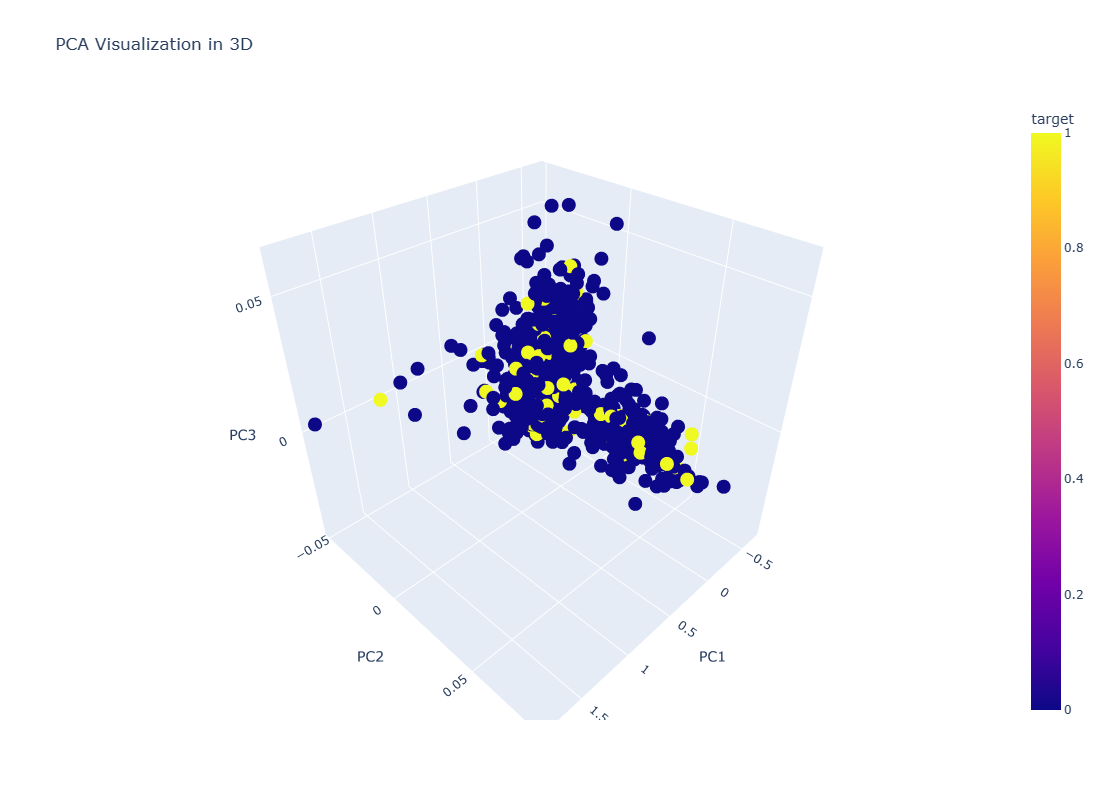

In [65]:
import plotly.express as px
fig = px.scatter_3d(pca_df_w2v, x='PC1', y='PC2', z='PC3', color='target',
                    title='PCA Visualization in 3D')

fig.update_layout(width=1000, height=800)
fig.show()


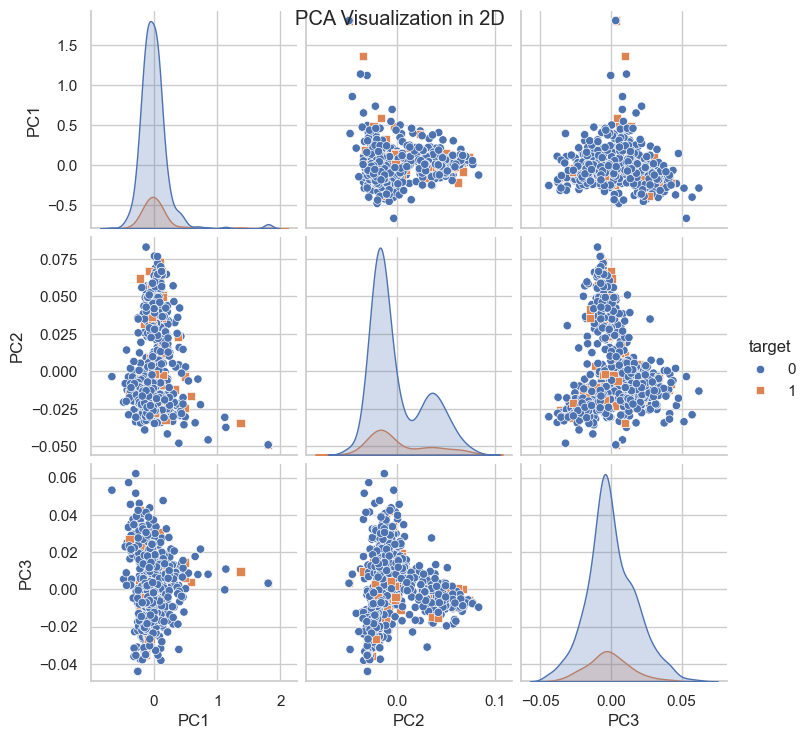

In [66]:
sns.set(style='whitegrid')

# Plotting in principal components in 2D 
sns.pairplot(data=pca_df_w2v, hue='target', markers=['o', 's'], diag_kind='kde')
plt.suptitle('PCA Visualization in 2D')
plt.show()

**Comment: Since data is not linearly separable,algorithms like Logistic regression, vanilla SVC are not suitable for this dataset instead ensemble techniques should be used.**

In [67]:
# CReating new dataframe

____________________________________________________________________________________________________________________________

**C. Splitting data to form a training and test dataset and later on dividing training data in 2 parts so as to obtain a training and validation set.**

In [68]:
from sklearn.model_selection import train_test_split
X= df_embeddings
y= y_target
X_train_a,X_test_a,y_train_a,y_test_a = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [69]:
# Concatenating X_train_a and y_train_a to further divide them and form training and validation set.

y_train_a= pd.Series(y_train_a)
X_train_a = X_train_a.reset_index(drop=True)
df_X_train_test_w2v = pd.concat([X_train_a, y_train_a], axis=1)
df_X_train_test_w2v.head(2)

embedding_0  embedding_1  embedding_2  embedding_3  embedding_4  \
0    -0.068062     0.089941     0.003522     0.121871     0.066996   
1    -0.081219     0.098193    -0.002252     0.123146     0.071163   

   embedding_5  embedding_6  embedding_7  embedding_8  embedding_9  \
0    -0.380662     0.155291     0.519283    -0.212812    -0.218936   
1    -0.403602     0.165919     0.560028    -0.235474    -0.236197   

   embedding_10  embedding_11  embedding_12  embedding_13  embedding_14  \
0     -0.076949     -0.415926     -0.062631      0.208832      0.125107   
1     -0.088970     -0.446283     -0.070701      0.222560      0.135293   

   embedding_15  embedding_16  embedding_17  embedding_18  embedding_19  \
0      0.032887      0.016936     -0.072679     -0.084515     -0.513125   
1      0.029116      0.017010     -0.071912     -0.091138     -0.552602   

   embedding_20  embedding_21  embedding_22  embedding_23  embedding_24  \
0      0.023892      0.023457      0.250515     -0.172503      0.006148   
1      0.019062      0.021292      0.274440     -0.177882      0.004792   

   embedding_25  embedding_26  embedding_27  embedding_28  embedding_29  \
0      0.064475     -0.239547     -0.070547     -0.176274      0.054621   
1      0.068864     -0.253134     -0.077100     -0.194537      0.060817   

   embedding_30  embedding_31  embedding_32  embedding_33  embedding_34  \
0      0.251199     -0.100541      0.237349     -0.304111     -0.088771   
1      0.274142     -0.112557      0.249426     -0.331266     -0.093959   

   embedding_35  embedding_36  embedding_37  embedding_38  embedding_39  \
0      0.357396      0.142973     -0.026392     -0.028482     -0.285450   
1      0.386102      0.152584     -0.028263     -0.027182     -0.307306   

   embedding_40  embedding_41  embedding_42  embedding_43  embedding_44  \
0      0.050693     -0.204042     -0.186804     -0.044892      0.226956   
1      0.056437     -0.220910     -0.206093     -0.048929      0.248407   

   embedding_45  embedding_46  embedding_47  embedding_48  embedding_49  \
0      0.068802     -0.095174      0.002596      0.131457      0.101957   
1      0.072529     -0.100272      0.005587      0.138461      0.104561   

   embedding_50  embedding_51  embedding_52  embedding_53  embedding_54  \
0      0.118347     -0.280465      0.038045     -0.000304     -0.066162   
1      0.129339     -0.304531      0.040765     -0.002414     -0.073679   

   embedding_55  embedding_56  embedding_57  embedding_58  embedding_59  \
0      0.058470      0.144519     -0.136616     -0.193217      0.090791   
1      0.058396      0.152793     -0.154935     -0.209353      0.087884   

   embedding_60  embedding_61  embedding_62  embedding_63  embedding_64  \
0     -0.003258     -0.029465      0.094890      0.048608     -0.103153   
1      0.000704     -0.032107      0.107554      0.052564     -0.107981   

   embedding_65  embedding_66  embedding_67  embedding_68  embedding_69  \
0      0.332884      0.048753      0.285773     -0.361588      0.417476   
1      0.358788      0.056473      0.313607     -0.395450      0.451645   

   embedding_70  embedding_71  embedding_72  embedding_73  embedding_74  \
0     -0.141397      0.157008      0.323615      0.021461      0.384005   
1     -0.147887      0.174988      0.348700      0.026821      0.411915   

   embedding_75  embedding_76  embedding_77  embedding_78  embedding_79  \
0     -0.017062      0.004755      0.009349     -0.081784     -0.097366   
1     -0.012874      0.001827      0.012950     -0.083966     -0.108067   

   embedding_80  embedding_81  embedding_82  embedding_83  embedding_84  \
0     -0.105859     -0.085273     -0.263065      0.200136     -0.209164   
1     -0.111127     -0.101070     -0.276854      0.213576     -0.224514   

   embedding_85  embedding_86  embedding_87  embedding_88  embedding_89  \
0     -0.167128      0.196585      0.032820      0.280719     -0.020777   
1     -0.187706      0.211472      0.0365

In [70]:
df_X_train_test_w2v.rename(columns={0:'target'},inplace=True)

In [71]:
#visulazing the finally obtained data which we will split further so as to create one training dataset and one validation set

df_X_train_test_w2v.head(2)

embedding_0  embedding_1  embedding_2  embedding_3  embedding_4  \
0    -0.068062     0.089941     0.003522     0.121871     0.066996   
1    -0.081219     0.098193    -0.002252     0.123146     0.071163   

   embedding_5  embedding_6  embedding_7  embedding_8  embedding_9  \
0    -0.380662     0.155291     0.519283    -0.212812    -0.218936   
1    -0.403602     0.165919     0.560028    -0.235474    -0.236197   

   embedding_10  embedding_11  embedding_12  embedding_13  embedding_14  \
0     -0.076949     -0.415926     -0.062631      0.208832      0.125107   
1     -0.088970     -0.446283     -0.070701      0.222560      0.135293   

   embedding_15  embedding_16  embedding_17  embedding_18  embedding_19  \
0      0.032887      0.016936     -0.072679     -0.084515     -0.513125   
1      0.029116      0.017010     -0.071912     -0.091138     -0.552602   

   embedding_20  embedding_21  embedding_22  embedding_23  embedding_24  \
0      0.023892      0.023457      0.250515     -0.172503      0.006148   
1      0.019062      0.021292      0.274440     -0.177882      0.004792   

   embedding_25  embedding_26  embedding_27  embedding_28  embedding_29  \
0      0.064475     -0.239547     -0.070547     -0.176274      0.054621   
1      0.068864     -0.253134     -0.077100     -0.194537      0.060817   

   embedding_30  embedding_31  embedding_32  embedding_33  embedding_34  \
0      0.251199     -0.100541      0.237349     -0.304111     -0.088771   
1      0.274142     -0.112557      0.249426     -0.331266     -0.093959   

   embedding_35  embedding_36  embedding_37  embedding_38  embedding_39  \
0      0.357396      0.142973     -0.026392     -0.028482     -0.285450   
1      0.386102      0.152584     -0.028263     -0.027182     -0.307306   

   embedding_40  embedding_41  embedding_42  embedding_43  embedding_44  \
0      0.050693     -0.204042     -0.186804     -0.044892      0.226956   
1      0.056437     -0.220910     -0.206093     -0.048929      0.248407   

   embedding_45  embedding_46  embedding_47  embedding_48  embedding_49  \
0      0.068802     -0.095174      0.002596      0.131457      0.101957   
1      0.072529     -0.100272      0.005587      0.138461      0.104561   

   embedding_50  embedding_51  embedding_52  embedding_53  embedding_54  \
0      0.118347     -0.280465      0.038045     -0.000304     -0.066162   
1      0.129339     -0.304531      0.040765     -0.002414     -0.073679   

   embedding_55  embedding_56  embedding_57  embedding_58  embedding_59  \
0      0.058470      0.144519     -0.136616     -0.193217      0.090791   
1      0.058396      0.152793     -0.154935     -0.209353      0.087884   

   embedding_60  embedding_61  embedding_62  embedding_63  embedding_64  \
0     -0.003258     -0.029465      0.094890      0.048608     -0.103153   
1      0.000704     -0.032107      0.107554      0.052564     -0.107981   

   embedding_65  embedding_66  embedding_67  embedding_68  embedding_69  \
0      0.332884      0.048753      0.285773     -0.361588      0.417476   
1      0.358788      0.056473      0.313607     -0.395450      0.451645   

   embedding_70  embedding_71  embedding_72  embedding_73  embedding_74  \
0     -0.141397      0.157008      0.323615      0.021461      0.384005   
1     -0.147887      0.174988      0.348700      0.026821      0.411915   

   embedding_75  embedding_76  embedding_77  embedding_78  embedding_79  \
0     -0.017062      0.004755      0.009349     -0.081784     -0.097366   
1     -0.012874      0.001827      0.012950     -0.083966     -0.108067   

   embedding_80  embedding_81  embedding_82  embedding_83  embedding_84  \
0     -0.105859     -0.085273     -0.263065      0.200136     -0.209164   
1     -0.111127     -0.101070     -0.276854      0.213576     -0.224514   

   embedding_85  embedding_86  embedding_87  embedding_88  embedding_89  \
0     -0.167128      0.196585      0.032820      0.280719     -0.020777   
1     -0.187706      0.211472      0.0365

In [72]:
# Further dividing the dataset so as to fform a training set and validation ste from the current Xtrain and y_train

X_train_b,X_test_b,y_train_b,y_test_b = train_test_split(X_train_a,y_train_a,test_size=0.2,stratify=y_train_a,random_state=42)

In [73]:
# out of X_train_b,X_test_b,y_train_b,y_test_b we will use X_train_b & y_train_b as training data and 
# X_test_b & y_test_b as validation set for hyperparameter tuning.

_________________________________________________________________________________________________________________________

**D. Model Building using default value of hyper paramters**

Comment:
- Logistic regression can not be used as data is not linearly separable.
- Only gaussian naive bayes can be used as data has fractional and negative values.

In [74]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [100]:
class_weights = {0: 1, 1: 30}
svc = SVC()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(class_weight=class_weights)
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier(class_weight=class_weights)

In [101]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)
    
    return accuracy,precision,recall,f1score

In [102]:
clfs = {
    'SVC' : svc,
    'KN' : knc,    
    'RF': rfc, 
    'GBDT':gbdt,
    'xgb':xgb
}

In [103]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
Algorithm = []
accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores =[]

for name,clf in clfs.items():

    # using the first split data to train and to calculate the evaluation metrics
    current_accuracy,current_precision,current_recall,current_F1Score = train_classifier(clf,X_train_a,y_train_a,X_test_a,y_test_a)

    Algorithm.append(name)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    F1_scores.append(current_F1Score)

result = pd.DataFrame({'Algorithm':Algorithm,'accuracy_scores': accuracy_scores,'precision_scores':precision_scores,'recall_scores':recall_scores,
                       'F1_scores':F1_scores})
result

Algorithm  accuracy_scores  precision_scores  recall_scores  F1_scores
0       SVC         0.866667          0.000000       0.000000   0.000000
1        KN         0.876923          1.000000       0.076923   0.142857
2        RF         0.841026          0.222222       0.076923   0.114286
3      GBDT         0.851282          0.200000       0.038462   0.064516
4       xgb         0.851282          0.000000       0.000000   0.000000

**Comment: Possible reasons for such low values of precision, recall and f1 score could be lack of data or high class imbalance. We could try to tune hyperparameters if the ressults dont improve, we may have to go for Method2 where we have to upsample the minority class.**
                                                    

________________________________________________________________________________________

**<u>i. Improving performance of SVC Algorithm by hyperparameter Tuning:</u>**

In [79]:
# Finding the optimum threshold value

In [80]:
# Defining a customized mertric
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_score

def custom_scorer(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    
    #custom_metric = 0.25 * accuracy + 0.5 * recall + 0.25 * precision
    custom_metric =  0.75 * recall + 0.25 * precision
    
    return custom_metric

custom_scorer = make_scorer(custom_scorer)


Comment: Instead of using weighted_recall_precision score we could have used scoring function like F-beta where F-beta = (1+β^2).precs.recal/ ((β^2) *precs+recal) As we increse the value of β the emphasis on recall will increase.

For Testing Data
Optimal threshold: 0.1328729055238258
Precision: 0.13812154696132597
Recall: 0.9615384615384616
F1_score: 0.23529411764705885
Accuracy: 0.8666666666666667


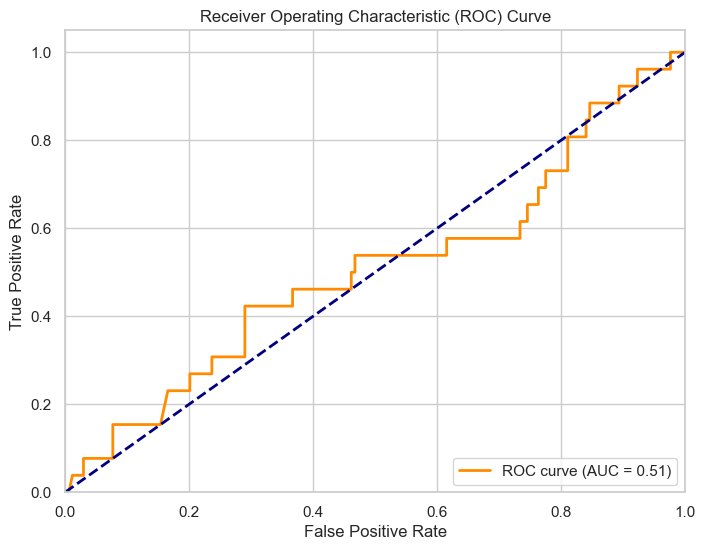

In [81]:
# Finding the optimum threshold value for the SVC algorithm:

from sklearn.metrics import roc_curve, auc, precision_recall_curve,f1_score
from sklearn.svm import SVC

classifier = SVC(probability=True, random_state=42)
classifier.fit(X_train_a, y_train_a)

# Get predicted probabilities for the positive class 
y_prob = classifier.predict_proba(X_test_a)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_a, y_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Finding the index of the maximum value of the ROC curve
optimal_threshold_idx_w2vec = np.argmax(tpr - fpr)
optimal_threshold_svc_w2vec = thresholds[optimal_threshold_idx_w2vec]


y_pred = classifier.predict(X_test_a)

# Calculating precision, recall, and accuracy
precision, recall, _ = precision_recall_curve(y_test_a, y_prob)
accuracy = accuracy_score(y_test_a, y_pred)
y_test_pred=(y_prob > optimal_threshold_svc_w2vec).astype(int)
f1 = f1_score(y_test_a, y_test_pred)

print("For Testing Data")
print('Optimal threshold:', optimal_threshold_svc_w2vec)
print('Precision:', precision[optimal_threshold_idx_w2vec])
print('Recall:', recall[optimal_threshold_idx_w2vec])
print('F1_score:',f1)
print('Accuracy:', accuracy)


Comment : Such low value of optimum threshold suggests that the data is highly immbalanced and low value of AUC is signifying that model is not able to learn, it is slighly better than random guessing.

since the number of negative points is quite higher as compare to the positive points ROC-AUC is not a right choice instead Precsision-recall curve would be a better choice

In [82]:
# with the above obtained optimum threshold value checking the metric values on training dataset

y_train_prob = classifier.predict_proba(X_train_a)[:, 1]
y_train_pred = (y_train_prob >= optimal_threshold_svc_w2vec).astype(int)

precision_train, recall_train, _ = precision_recall_curve(y_train_a, y_train_prob)
accuracy_train = accuracy_score(y_train_a, y_train_pred)
f_score_trained= f1_score(y_train_a, y_train_pred)

print("For Training Data")
print('Optimal threshold:', optimal_threshold_svc_w2vec)
print('Precision:', precision_train[optimal_threshold_idx_w2vec])
print('Recall:', recall_train[optimal_threshold_idx_w2vec])
print('F1score:', f_score_trained)
print('Accuracy:', accuracy_train)

For Training Data
Optimal threshold: 0.1328729055238258
Precision: 0.1256544502617801
Recall: 0.9320388349514563
F1score: 0.10256410256410256
Accuracy: 0.6405648267008985


In [83]:
# taking the above threshold value and training the SVC model on that for further hyperparameter tuning

In [84]:
# Setting the threshold parameter and forming two instances of same

classifier_svc_BO_w2vec = SVC(probability=True, random_state=42)
classifier_svc_BO_w2vec.threshold = optimal_threshold_svc_w2vec

classifier_svc_M = SVC(probability=True, random_state=42)
classifier_svc_M.threshold = optimal_threshold_svc_w2vec

In [85]:
# using grid search cv to find optimum hyperparameter values.

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
kernel = ['linear','rbf','sigmoid','poly']
gamma = ["scale", "auto"]
grid = dict(kernel=kernel,gamma=gamma)
grid_search_svc = GridSearchCV(estimator=classifier_svc_BO_w2vec, param_grid=grid, cv=5,scoring=custom_scorer,n_jobs=-1)
grid_result_svc = grid_search_svc.fit(X_train_a, y_train_a)
print("Best: %f using %s" % (grid_result_svc.best_score_, grid_result_svc.best_params_))

Best: 0.000000 using {'gamma': 'scale', 'kernel': 'linear'}


In [86]:
#!pip install bayesian-optimization

**ii.<u>RANDOM FOREST</u>** 

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['sqrt', 'log2', None]
grid = dict(criterion=criterion,max_features = max_features)
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=5, scoring=custom_scorer,n_jobs=-1)
grid_result_rf = grid_search_rf.fit(X_train_a, y_train_a)
print("Best: %f using %s" % (grid_result_rf.best_score_, grid_result_rf.best_params_))

Best: 0.166071 using {'criterion': 'entropy', 'max_features': 'log2'}


**Comment:  Based on the above results we can conclude that because of lack of data and class imbalance the method 1 is not suitable. Lets work with Method2 where we upsample the minority class.**

________________________________________________________________________________________________________________________

### 2. <u>Using Method 2 Where We Will upsample the minority class </u>

**<u>A. Using Word2vec Approach</u>** 

**Comment: For resampling we can use either do random sampling from the minority class or we can use SMOTE. But for resampling from the minorityclass with replacement the % of duplicates in the set will become quite high which will lead to overfitting ,data leakage and poor generalisation hence we will use SMOTE to create syntherti minority data.**

In [88]:
#!pip install imbalanced-learn

In [89]:
df_embeddings
y= pd.Series(y_target)
df_embedd_target =pd.concat([df_embeddings,y],axis=1)

In [90]:
df_embedd_target.rename(columns={0:'target'},inplace=True)

In [91]:
df_embedd_target['target'].value_counts()

target
0    845
1    129
Name: count, dtype: int64

In [92]:
# using Smote

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')

X_resampled, y_resampled = smote.fit_resample(df_embeddings, y)

In [93]:
X= X_resampled
y= y_resampled
X_train_c,X_test_c,y_train_c,y_test_c = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [94]:
Algorithm=[]
accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores =[]

for name,clf in clfs.items():

    current_accuracy,current_precision,current_recall,current_F1Score = train_classifier(clf,X_train_c,y_train_c,X_test_c,y_test_c)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall -",current_recall)
    print("F1_Score-",current_F1Score)

    Algorithm.append(name)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    F1_scores.append(current_F1Score)

For  SVC
Accuracy -  0.5177514792899408
Precision -  0.5192307692307693
Recall - 0.47928994082840237
F1_Score- 0.4984615384615385
For  KN
Accuracy -  0.7514792899408284
Precision -  0.6778242677824268
Recall - 0.9585798816568047
F1_Score- 0.7941176470588235
For  RF
Accuracy -  0.908284023668639
Precision -  0.8670212765957447
Recall - 0.9644970414201184
F1_Score- 0.9131652661064427
For  GBDT
Accuracy -  0.8609467455621301
Precision -  0.805
Recall - 0.9526627218934911
F1_Score- 0.872628726287263
For  xgb
Accuracy -  0.878698224852071
Precision -  0.82
Recall - 0.9704142011834319
F1_Score- 0.8888888888888888


In [95]:
# sorting the values basedon recall and incase of tie we can use accuracy as tie breaker

result_basci_w2vec_df = pd.DataFrame({'Algorithm':Algorithm, 'Accuracy':accuracy_scores,  'Precision':precision_scores , 'Recall': recall_scores , 'F1_Score':F1_scores})
result_basci_w2vec_df.sort_values(by=['Recall','Accuracy'])

Algorithm  Accuracy  Precision    Recall  F1_Score
0       SVC  0.517751   0.519231  0.479290  0.498462
3      GBDT  0.860947   0.805000  0.952663  0.872629
1        KN  0.751479   0.677824  0.958580  0.794118
2        RF  0.908284   0.867021  0.964497  0.913165
4       xgb  0.878698   0.820000  0.970414  0.888889

**Comment: from above results we can say that Xgboost and random forest are performing relatively well.**

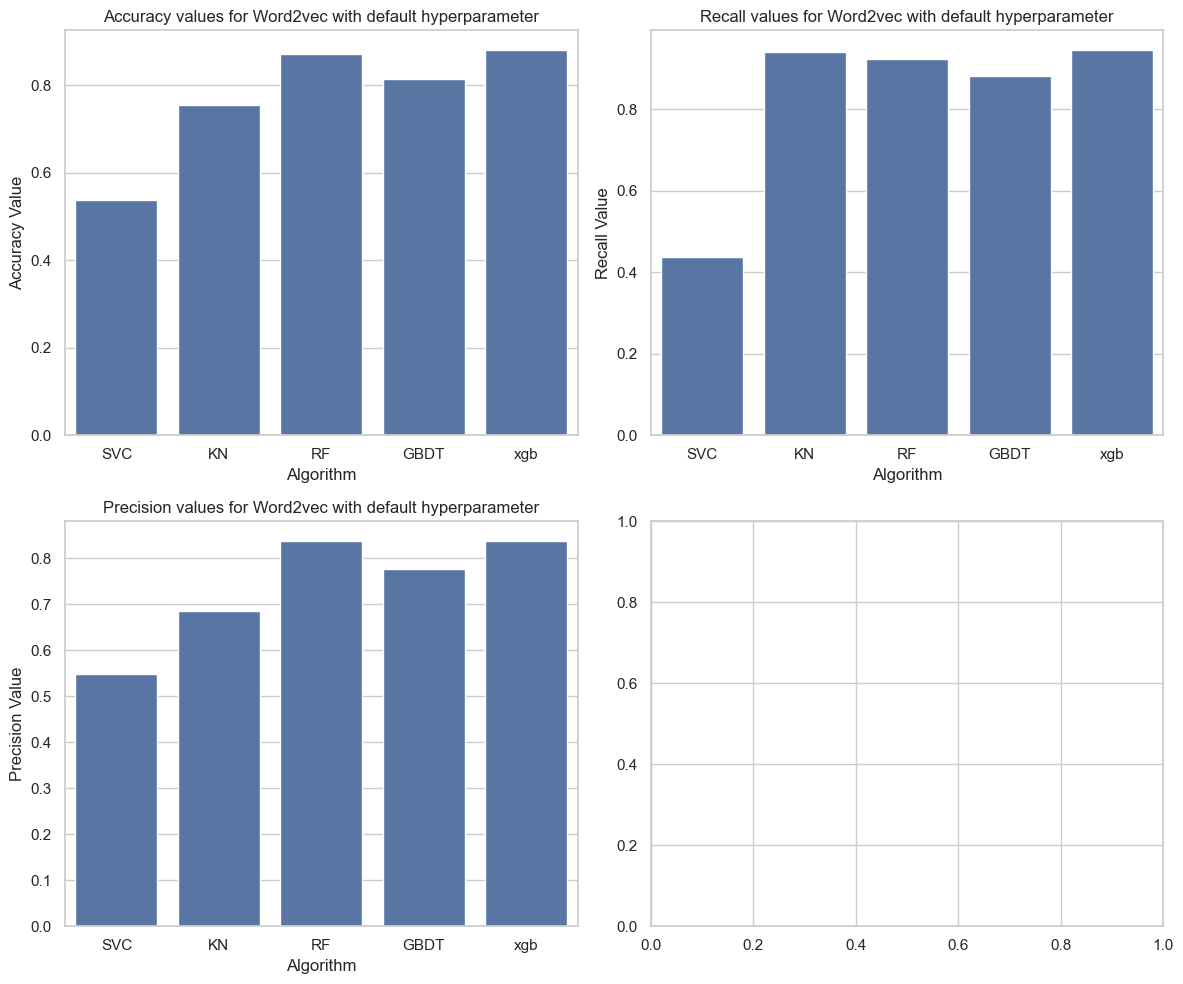

In [122]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))  
metrics = ['Accuracy', 'Recall', 'Precision']

for i, metric in enumerate(metrics):
    row = i // 2  
    col = i % 2   
    
    sns.barplot(data=result_basci_w2vec_df, x='Algorithm', y=metric, ax=ax[row, col])
    ax[row, col].set_title(f'{metric} values for Word2vec with default hyperparameter')  
    ax[row, col].set_xlabel('Algorithm')  
    ax[row, col].set_ylabel(f'{metric} Value')  

plt.tight_layout()  
plt.show()


**<u>i. Hyperparameter tuning for SVC algorithm</u>**

For Testing Data
Optimal threshold: 0.4930686775526425
Precision: 0.5303643724696356
Recall: 0.7751479289940828
F1_score: 0.6219839142091153
Accuracy: 0.5384615384615384


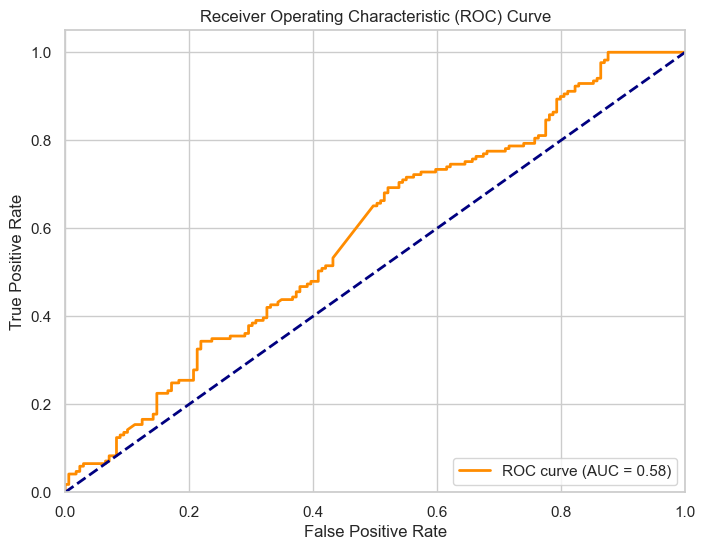

In [97]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve,f1_score
from sklearn.svm import SVC

classifier = SVC(probability=True, random_state=42)
classifier.fit(X_train_c, y_train_c)

# Get predicted probabilities for the positive class 
y_prob = classifier.predict_proba(X_test_c)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_c, y_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Finding the index of the maximum value of the ROC curve
optimal_threshold_idx_w2vec = np.argmax(tpr - fpr)
optimal_threshold_svc_w2vec = thresholds[optimal_threshold_idx_w2vec]


y_pred = classifier.predict(X_test_c)

# Calculating precision, recall, and accuracy
precision, recall, _ = precision_recall_curve(y_test_c, y_prob)
accuracy = accuracy_score(y_test_c, y_pred)
y_test_pred=(y_prob > optimal_threshold_svc_w2vec).astype(int)
f1 = f1_score(y_test_c, y_test_pred)

print("For Testing Data")
print('Optimal threshold:', optimal_threshold_svc_w2vec)
print('Precision:', precision[optimal_threshold_idx_w2vec])
print('Recall:', recall[optimal_threshold_idx_w2vec])
print('F1_score:',f1)
print('Accuracy:', accuracy)


Comment: with optimum threshold value of recall and precision has improved but accuracy has not improved at all.

In [98]:
# Using the threshold value thus obtained to update the classifier and the forming two separate instances for hyperparameter tuning

classifier_svc_BO1 = SVC(probability=True, random_state=42)
# Setting the threshold parameter
classifier_svc_BO1.threshold = optimal_threshold_svc_w2vec

classifier_svc_M1 = SVC(probability=True, random_state=42)
classifier_svc_M1.threshold = optimal_threshold_svc_w2vec

In [99]:
# using Grid search cv to find the best parameters

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
kernel = ['linear','rbf','sigmoid','poly']
gamma = ["scale", "auto"]
grid = dict(kernel=kernel,gamma=gamma)
grid_search_svc = GridSearchCV(estimator=classifier_svc_BO1 , param_grid=grid, cv=5, scoring=custom_scorer,n_jobs=-1)
grid_result_svc = grid_search_svc.fit(X_train_c, y_train_c)
print("Best: %f using %s" % (grid_result_svc.best_score_, grid_result_svc.best_params_))

Best: 0.483518 using {'gamma': 'auto', 'kernel': 'poly'}


In [102]:
from sklearn.metrics import make_scorer, recall_score,precision_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

def svc_objective(C):
#     classifier_svc_BO.gamma= 'scale' 
#     classifier_svc_BO.kernel= 'rbf'
#     classifier_svc_BO.C =C
#    or
    classifier_svc_BO1.set_params(gamma='scale', kernel='poly', C=C)
    
    recall_scorer = make_scorer(recall_score, pos_label=1)
    precision_scorer = make_scorer(precision_score, pos_label=1)
    
    recall_scores = cross_val_score(classifier_svc_BO1, X_train_c, y_train_c, cv=3, scoring=recall_scorer)
    precision_scores = cross_val_score(classifier_svc_BO1, X_train_c, y_train_c, cv=3, scoring=precision_scorer)
    
    # Calculating a weighted combination of recall and precision score 
    weighted_score = 0.75 * recall_scores.mean() + 0.25 * precision_scores.mean()
    
    return weighted_score


param_bounds = {'C': (0.001, 99.99)}  

# Performing Bayesian optimization
optimizer = BayesianOptimization(f=svc_objective, pbounds=param_bounds,allow_duplicate_points=True)
optimizer.maximize(n_iter=15, init_points=5)

# Get the best hyperparameters and the corresponding maximum validation score
best_params = optimizer.max['params']
best_score = optimizer.max['target']
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

|   iter    |  target   |     C     |
-------------------------------------
| 1         | 0.6905    | 34.93     |
| 2         | 0.7317    | 64.88     |
| 3         | 0.6327    | 13.82     |
| 4         | 0.7037    | 42.84     |
| 5         | 0.7332    | 90.9      |
| 6         | 0.733     | 78.51     |
| 7         | 0.7319    | 89.45     |
| 8         | 0.7338    | 99.99     |
| 9         | 0.7314    | 71.54     |
| 10        | 0.7251    | 57.39     |
| 11        | 0.7325    | 96.15     |
| 12        | 0.7329    | 75.74     |
| 13        | 0.7336    | 93.1      |
| 14        | 0.7338    | 99.99     |
Data point [99.99] is not unique. 1 duplicates registered. Continuing ...
| 15        | 0.7338    | 99.99     |
Data point [99.99] is not unique. 2 duplicates registered. Continuing ...
| 16        | 0.7338    | 99.99     |
Data point [99.99] is not unique. 3 duplicates registered. Continuing ...
| 17        | 0.7338    | 99.99     |
Data point [99.99] is not unique. 4 duplicates registere

Comment :Best HyperParameter value based on the training data: 'C': 99.99 , 'gamma': 'scale', 'kernel': 'poly'

Max Acc obtained at C = 0.01, Weighted_Recall_precision_score = 0.5615945725362171


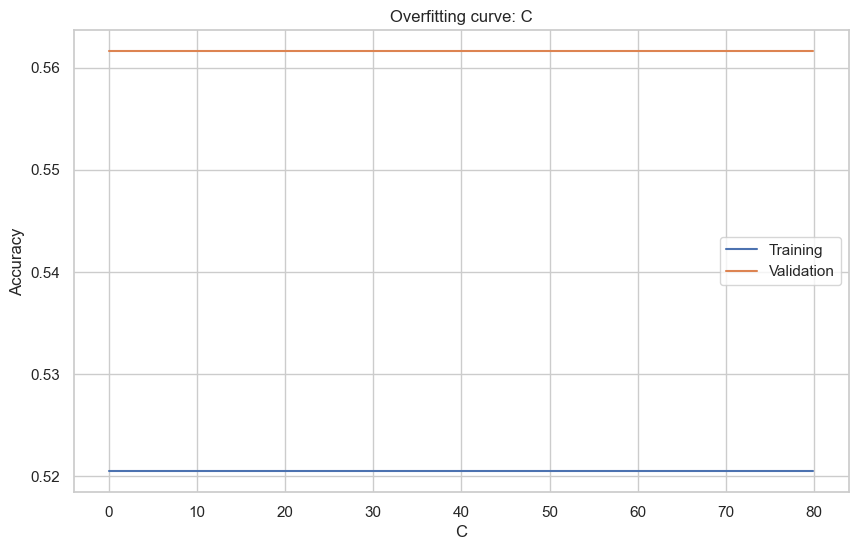

In [103]:
# obtaining the optimum value of C for which the data is not overfitted on the training data.

def test_params(**params):
    classifier_svc_M.set_params(gamma= 'auto', kernel= 'poly',**params)
    model=classifier_svc_M.fit(X_train_c, y_train_c)
    train_score_recall = recall_score(model.predict(X_train_c), y_train_c)
    train_score_precision = precision_score(model.predict(X_train_c), y_train_c)
    
    val_score_recall = recall_score(model.predict(X_test_c), y_test_c)
    val_score_precision = precision_score(model.predict(X_test_c), y_test_c)
    
    train_weighted_score = 0.75 * train_score_recall + 0.25 * train_score_precision
    val_weighted_score = 0.75 * val_score_recall + 0.25 * val_score_precision
    
    return train_weighted_score, val_weighted_score

def test_param_and_plot(param_name, param_values):
    train_acc, val_acc = [], []
    best_param_value = None  
    max_val_acc = 0.0  
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_acc.append(train_score)
        val_acc.append(val_score)
        
        if val_score > max_val_acc:
            max_val_acc = val_score
            best_param_value = value
    
    plt.figure(figsize=(10, 6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc)
    plt.plot(param_values, val_acc)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    print(f"Max Acc obtained at {param_name} = {best_param_value}, Weighted_Recall_precision_score = {max_val_acc}")
    
n_values = [i/100 for i in range(1,8000,10)]
test_param_and_plot('C', n_values)

Comment Best value obtained at C= 0.01 

In [104]:
# Accuracy, precision,recall and F1 score using the hyperparameter values.

svc_w2vec= SVC(C = 0.01,gamma= 'scale', kernel= 'poly')
svc_w2vec.threshold = optimal_threshold_svc_w2vec
svc_w2vec.fit(X_train_c,y_train_c)

SVC(C=0.01, kernel='poly')

In [105]:
y_pred = svc_w2vec.predict(X_test_c)

# Calculating precision, recall, and accuracy
precision_svc_w2vec=precision_score(y_test_c, y_pred)
recall_svc_w2vec= recall_score(y_test_c, y_pred)
accuracy_svc_w2vec = accuracy_score(y_test_c, y_pred)
f1_svc_w2vec = f1_score(y_test_c, y_test_pred)

print("Best Obtained value for SVC using word2vec:")
print('Precision:', precision_svc_w2vec)
print('Recall:', recall_svc_w2vec)
print('F1_score:',f1_svc_w2vec)
print('Accuracy:', accuracy_svc_w2vec)

Best Obtained value for SVC using word2vec:
Precision: 0.5574712643678161
Recall: 0.5739644970414202
F1_score: 0.6219839142091153
Accuracy: 0.5591715976331361


In [106]:
# creating a data frame from this value:

results_df = pd.DataFrame({'Name':['SVC_word2_vec_tuned'],'Precision': [0.55],'Recall':[ 0.8461538461538461],'F1_score': [0.6461538461538461],'Accuracy': [0.5769230769230769]})
results_df

Name  Precision    Recall  F1_score  Accuracy
0  SVC_word2_vec_tuned       0.55  0.846154  0.646154  0.576923

In [107]:
dict2 = {'Name':['SVC_word2_vec_default'],'Precision': [0.3333333333333333],'Recall':[ 0.11538461538461539],'F1_score': [0.17142857142857146],'Accuracy': [0.4423076923076923]}
results_df=pd.concat([results_df,pd.DataFrame(dict2)],axis=0,ignore_index=True)
results_df

Name  Precision    Recall  F1_score  Accuracy
0    SVC_word2_vec_tuned   0.550000  0.846154  0.646154  0.576923
1  SVC_word2_vec_default   0.333333  0.115385  0.171429  0.442308

**<u>ii.Hyperparameter tuning for XGboostclassifier:</u>**

In [112]:
%%time
from xgboost import XGBClassifier
 
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.05,0.01,0.005],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5,7],
    'gamma': [0.0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_classifier = XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, 
                           scoring=custom_scorer, cv=3, n_jobs=-1)

grid_result = grid_search.fit(X_train_c, y_train_c)

best_params = grid_result.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
CPU times: total: 4min 6s
Wall time: 1h 23min 58s


In [123]:
# Creating a new XGBoost model with the best parameters
best_xgb_classifier = XGBClassifier(random_state=42, **best_params)

best_xgb_classifier.fit(X_train_c, y_train_c)

y_pred = best_xgb_classifier.predict(X_test_c)

precision_xg_w2vec=precision_score(y_test_c, y_pred)
recall_xg_w2vec= recall_score(y_test_c, y_pred)
accuracy_xg_w2vec = accuracy_score(y_test_c, y_pred)
f1_xg_w2vec = f1_score(y_test_c, y_test_pred)

print('Precision:', precision_xg_w2vec)
print('Recall:', recall_xg_w2vec)
print('F1_score:',accuracy_xg_w2vec)
print('Accuracy:', f1_xg_w2vec)

Precision: 0.8333333333333334
Recall: 0.9467455621301775
F1_score: 0.878698224852071
Accuracy: 0.6219839142091153


In [125]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

def xgboost_objective(n_estimators, max_depth, gamma, min_child_weight, learning_rate, subsample, colsample_bytree):
   
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    learning_rate = float(learning_rate)
    subsample = float(subsample)
    colsample_bytree = float(colsample_bytree)
    gamma = float(gamma)
    min_child_weight = int(min_child_weight)
    
    xg = XGBClassifier(n_estimators=n_estimators, 
                       max_depth=max_depth,
                       learning_rate=learning_rate,
                       subsample=subsample,
                       colsample_bytree=colsample_bytree,
                       gamma=gamma,
                       min_child_weight=min_child_weight)
    
    scores = cross_val_score(xg, X_train_c, y_train_c, cv=3, scoring=custom_scorer)
    mean_score = scores.mean()  
    
    return mean_score  

param_bounds = {'n_estimators': (10, 200),
                'max_depth': (1, 8),
                'learning_rate': (0.001, 0.1),
                'subsample': (0.1, 1),
                'colsample_bytree': (0.1, 1),
                'gamma': (0.0, 1),
                'min_child_weight': (1, 10)
               }

# Performing Bayesian optimization
optimizer = BayesianOptimization(f=xgboost_objective, pbounds=param_bounds)
optimizer.maximize(n_iter=10, init_points=5)

best_params = optimizer.max['params']
best_score = optimizer.max['target']
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | 0.804     | 0.5342    | 0.02377   | 0.09439   | 5.612     | 9.46      | 45.43     | 0.968     |
| 2         | 0.78      | 0.9615    | 0.2405    | 0.0551    | 5.052     | 4.475     | 148.2     | 0.1571    |
| 3         | 0.7509    | 0.614     | 0.7044    | 0.01889   | 7.112     | 9.179     | 18.88     | 0.524     |
| 4         | 0.7417    | 0.8207    | 0.5405    | 0.03065   | 2.896     | 9.42      | 192.3     | 0.4026    |
| 5         | 0.7792    | 0.1492    | 0.1031    | 0.08096   | 2.912     | 1.368     | 118.1     | 0.8353    |
| 6         | 0.678     | 0.3164    | 0.5677    | 0.04417   | 5.596     | 9.435     | 44.88     | 0.2539    |
| 7         | 0.7623    | 0.9777    | 0.3891    | 0.003416  | 4.404     | 2.066     | 151.7     | 0.3413    |
| 8       

In [141]:
# Metric value using above obtained values:

model_bayesian = XGBClassifier(colsample_bytree= 0.8213638455053517, gamma= 0.7488290916957203, learning_rate= 0.054423767495942695, max_depth= 7, 
                                min_child_weight= 3, n_estimators= 39, subsample= 0.7615175510298416)
model_bayesian.fit(X_train_c, y_train_c)

y_pred = model_bayesian.predict(X_test_c)

precision_xg_w2vec_model_bayesian = precision_score(y_test_c, y_pred)
recall_xg_w2vec_model_bayesian = recall_score(y_test_c, y_pred)
accuracy_xg_w2vec_model_bayesian = accuracy_score(y_test_c, y_pred)
f1_xg_w2vec_model_bayesian = f1_score(y_test_c, y_pred)

result2_XGB_model_bayesian = pd.DataFrame({
    'Name':['XGB_model_bayesian'],
    'Recall': [recall_xg_w2vec_model_bayesian],
    'Precision': [precision_xg_w2vec_model_bayesian],
    'Accuracy': [accuracy_xg_w2vec_model_bayesian],
    'F1score': [f1_xg_w2vec_model_bayesian]
})

result2_XGB_model_bayesian

Name    Recall  Precision  Accuracy   F1score
0  XGB_model_bayesian  0.869822   0.757732  0.795858  0.809917

**<u>Usimg manual approach to obtain optimum value for hyperparameter which dont lead to overfitting</u>** 

Max Acc obtained at n_estimators = 140, Accuracy = 0.893491124260355


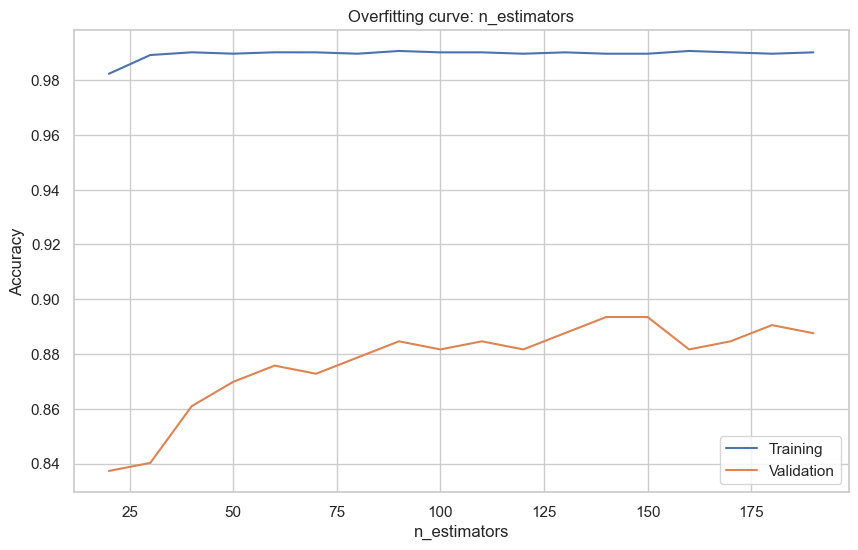

In [134]:
# Finding optimum value of n_estimators

def test_params(**params):
    model = XGBClassifier(random_state=42, **params)
    model.fit(X_train_c, y_train_c)
    
    train_score = 0.35*accuracy_score(model.predict(X_train_c), y_train_c)+0.5*recall_score(model.predict(X_train_c), y_train_c)+ 0.15*precision_score(model.predict(X_train_c), y_train_c)
    val_score = accuracy_score(model.predict(X_test_c), y_test_c)
    return train_score, val_score

def test_param_and_plot(param_name, param_values):
    train_acc, val_acc = [], []
    best_param_value = None  
    max_val_acc = 0.0  
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_acc.append(train_score)
        val_acc.append(val_score)
        
        if val_score > max_val_acc:
            max_val_acc = val_score
            best_param_value = value
    
    plt.figure(figsize=(10, 6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc)
    plt.plot(param_values, val_acc)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    print(f"Max Acc obtained at {param_name} = {best_param_value}, Accuracy = {max_val_acc}")


n_values = range(20,200,10)
test_param_and_plot('n_estimators', n_values)

Max Acc obtained at learning_rate = 0.071, Accuracy = 0.8994082840236687


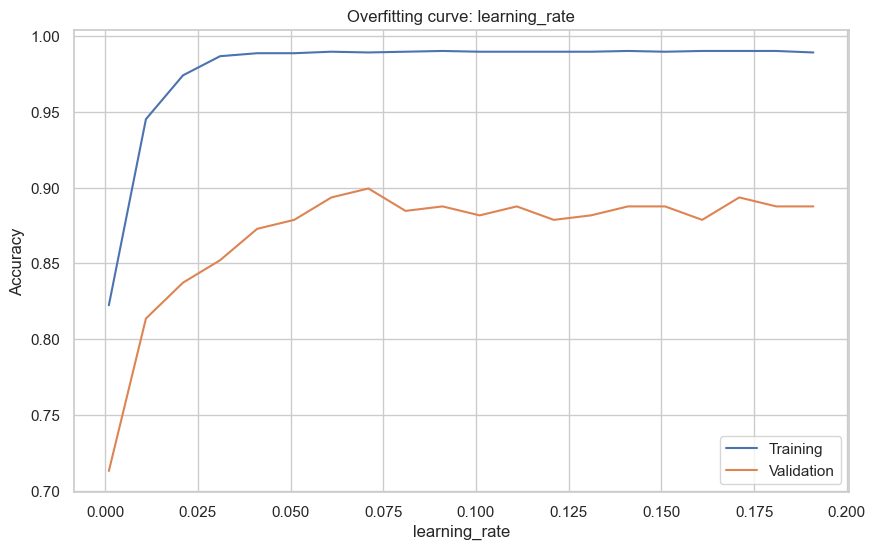

In [127]:
#learning rate

def test_params(**params):
    model = XGBClassifier(random_state=42, n_estimators = 230,**params)
    model.fit(X_train_c, y_train_c)
    
    train_score = 0.35*accuracy_score(model.predict(X_train_c), y_train_c)+0.5*recall_score(model.predict(X_train_c), y_train_c)+ 0.15*precision_score(model.predict(X_train_c), y_train_c)
    val_score = accuracy_score(model.predict(X_test_c), y_test_c)
    return train_score, val_score

def test_param_and_plot(param_name, param_values):
    train_acc, val_acc = [], []
    best_param_value = None  
    max_val_acc = 0.0  
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_acc.append(train_score)
        val_acc.append(val_score)
        
        if val_score > max_val_acc:
            max_val_acc = val_score
            best_param_value = value
    
    plt.figure(figsize=(10, 6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc)
    plt.plot(param_values, val_acc)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    print(f"Max Acc obtained at {param_name} = {best_param_value}, Accuracy = {max_val_acc}")


n_values = [i/1000 for i in range(1,200,10)]
test_param_and_plot('learning_rate', n_values)

Max Acc obtained at subsample = 0.71, Accuracy = 0.8905325443786982


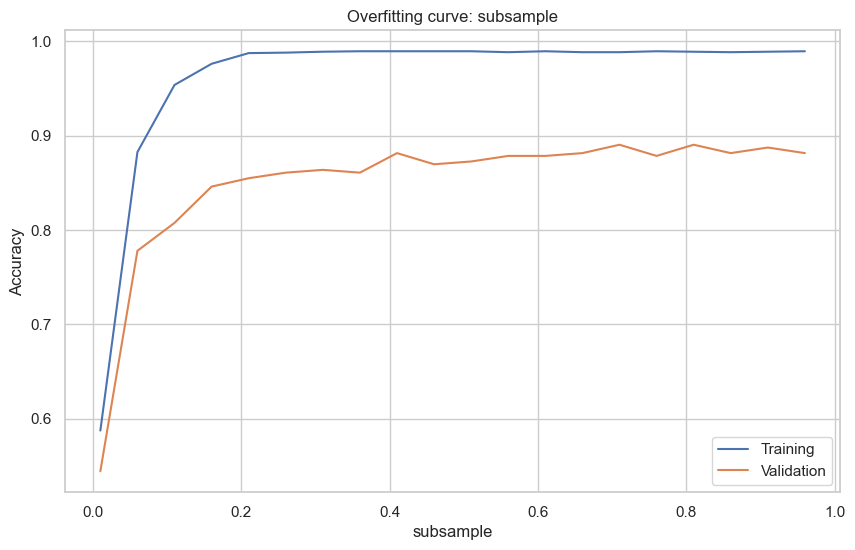

In [128]:
#subsample

def test_params(**params):
    model = XGBClassifier(random_state=42, n_estimators = 170,learning_rate = 0.131,**params)
    model.fit(X_train_c, y_train_c)
    
    train_score = 0.35*accuracy_score(model.predict(X_train_c), y_train_c)+0.5*recall_score(model.predict(X_train_c), y_train_c)+ 0.15*precision_score(model.predict(X_train_c), y_train_c)
    val_score = accuracy_score(model.predict(X_test_c), y_test_c)
    return train_score, val_score

def test_param_and_plot(param_name, param_values):
    train_acc, val_acc = [], []
    best_param_value = None  
    max_val_acc = 0.0  
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_acc.append(train_score)
        val_acc.append(val_score)
        
        if val_score > max_val_acc:
            max_val_acc = val_score
            best_param_value = value
    
    plt.figure(figsize=(10, 6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc)
    plt.plot(param_values, val_acc)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    print(f"Max Acc obtained at {param_name} = {best_param_value}, Accuracy = {max_val_acc}")


n_values = [i/100 for i in range(1,100,5)]
test_param_and_plot('subsample', n_values)

In [145]:
tuned_xgb_classifier = XGBClassifier(n_estimators = 170,learning_rate = 0.131,subsample = 0.86)

tuned_xgb_classifier.fit(X_train_c, y_train_c)

y_pred = tuned_xgb_classifier.predict(X_test_c)

precision_xg_w2vec_tuned=precision_score(y_test_c, y_pred)
recall_xg_w2vec_tuned= recall_score(y_test_c, y_pred)
accuracy_xg_w2vec_tuned = accuracy_score(y_test_c, y_pred)
f1_xg_w2vec_tuned = f1_score(y_test_c, y_pred)

result2_XGB_tuned = pd.DataFrame({
    'Name':['XGB_model_bayesian'],
    'Recall': [recall_xg_w2vec_tuned],
    'Precision': [precision_xg_w2vec_tuned],
    'Accuracy': [f1_xg_w2vec_tuned],
    'F1score': [f1_xg_w2vec_tuned]
})

result2_XGB_tuned

Name    Recall  Precision  Accuracy   F1score
0  XGB_model_bayesian  0.952663   0.851852  0.899441  0.899441

In [142]:
result2_XGB_model_bayesian

Name    Recall  Precision  Accuracy   F1score
0  XGB_model_bayesian  0.869822   0.757732  0.795858  0.809917

**Comment: the model with tuned parameter obtained via manual tuning is giving better results then the model obtained using bayesian optimization.** 

In [153]:
def evaluate_classifier(classifier_name, classifier, X_test, y_true, results_df):
    y_pred = classifier.predict(X_test)
    
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    
    results_df.loc[len(results_df)] = [classifier_name, precision, recall, f1, accuracy]

In [154]:
evaluate_classifier('Xgboost_tuned',tuned_xgb_classifier,X_test_c,y_test_c,results_df)

In [155]:
evaluate_classifier('Xgboost_default',xgb,X_test_c,y_test_c,results_df)

In [162]:
results_df

Name  Precision    Recall  F1_score  Accuracy
0    SVC_word2_vec_tuned   0.550000  0.846154  0.646154  0.576923
1  SVC_word2_vec_default   0.333333  0.115385  0.171429  0.442308
2          Xgboost_tuned   0.851852  0.952663  0.899441  0.893491
3        Xgboost_default   0.837696  0.946746  0.888889  0.881657

**What else I could have done:**
- tuning the vector size hyperparameter in word2vec and study its impact on the accuracy.  
- ohe_leads and ohe_location can be added to the embedding df and then we can study its impact on the accuracy.**

**Dear Mentor**
please add your comments here

_______________________________________________________________________________________________

### <u>**Approach 2: Using CountVectorizer and TfidfVectorizer**</u>

**A. Creating the vectors**

In [163]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer() # we are taking all the generated features, we could set limit on max_features which might enchance accuracy at a later stage

In [164]:
X_cv = cv.fit_transform(df['transformed_text'])

In [165]:
X_cv = cv.fit_transform(df['transformed_text']).toarray()

In [166]:
# creating dataframe 

X_cv_df = pd.DataFrame(X_cv, columns=cv.get_feature_names_out())

In [167]:
X_cv_df.head()

10  10am  10k  10min  10miz  10pm  10th  11  11am  12  12pm  12th  13  \
0   0     0    0      0      0     0     0   0     0   0     0     0   0   
1   0     0    0      0      0     0     0   0     0   0     0     0   0   
2   0     0    0      0      0     0     0   0     0   0     0     0   0   
3   0     0    0      0      0     0     0   0     0   0     0     0   0   
4   0     0    0      0      0     0     0   0     0   0     0     0   0   

   13th  14  14k  14wknd  15  15k  15min  15minz  15th  16th  17k  19  19th  \
0     0   0    0       0   0    0      0       0     0     0    0   0     0   
1     0   0    0       0   0    0      0       0     0     0    0   0     0   
2     0   0    0       0   0    0      0       0     0     0    0   0     0   
3     0   0    0       0   0    0      0       0     0     0    0   0     0   
4     0   0    0       0   0    0      0       0     0     0    0   0     0   

   1hour  1hr  1mnth  1pm  1st  1to1  1week  2018  20minz  20th  20yr  21  \
0      0    0      0    0    0     0      0     0       0     0     0   0   
1      0    0      0    0    0     0      0     0       0     0     0   0   
2      0    0      0    0    0     0      0     0       0     0     0   0   
3      0    0      0    0    0     0      0     0       0     0     0   0   
4      0    1      0    0    0     0      0     0       0     0     0   0   

   21st  22k  23rd  24  24th  25  25k  26th  27  27k  27th  28  29  29th  \
0     0    0     0   0     0   0    0     0   0    0     0   0   0     0   
1     0    0     0   0     0   0    0     0   0    0     0   0   0     0   
2     0    0     0   0     0   0    0     0   0    0     0   0   0     0   
3     0    0     0   0     0   0    0     0   0    0     0   0   0     0   
4     0    0     0   0     0   0    0     0   0    0     0   0   0     0   

   2day  2marow  2member  2mnth  2month  2nd  2pm  30  30min  30minz  31  \
0     0       0        0      0       0    0    0   0      0       0   0   
1     0       0        0      0       0    0    0   0      0       0   0   
2     0       0        0      0       0    0    0   0      0       0   0   
3     0       0        0      0       0    0    0   0      0       0   0   
4     0       0        0      0       0    0    0   0      0       0   0   

   3day  3month  3pm  40  40min  4m  4pm  5di  5k  5pm  5th  6am  6clock  \
0     0       0    0   0      0   0    0    0   0    0    0    0       0   
1     0       0    0   0      0   0    0    0   0    0    0    0       0   
2     0       0    0   0      0   0    0    0   0    0    0    0       0   
3     0       0    0   0      0   0    0    0   0    0    0    0       0   
4     0       0    0   0      0   0    0    0   0    0    0    0       0   

   6month  6pm  6sigma  6th  7pm  8pm  9940422107  abdul  abl  about  abroad  \
0       0    0       0    0    0    0           0      0    0      0       0   
1       0    0       0    0    0    0           0      0    0      0       0   
2       0    0       0    0    0    0           0      0    0      0       0   
3       0    0       0    0    0    0           0      0    0      0       0   
4       0    0       0    0    0    0           0      0    0      0       0   

   accept  accordingli  actual  ad  addr  address  admin  admit  adr  adress  \
0       0            0       0   0     0        0      0      0    0       0   
1       0            0       0   0     0        0      0      0    0       0   
2       0            0       0   0     0        0      0      0    0       0   
3       0            0       0   0     0        0      0      0    0       0   
4       0            0       0   0     0        0      0      0    0       0   

   advanc  afternoon  afterward  afterwardd  aftr  aftrnun  agenc  agenda  \
0       0          0          0           0     0        0      0       0   
1       0          0          0           0     0        0      0       0   
2       0          0          0           0 

In [168]:
X_cv_df.shape

(974, 1087)

In [169]:
y_target =df['target'].values
y_target

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [170]:
# concatenating the dataframe df[['location']] ohe and Vectorized data and for the moment omitting lead  name dataframe

df_input_X = pd.concat([ohe_df_location,X_cv_df],axis=1)
df_input_X.head()

Location_aura  Location_aust  Location_bang  Location_biha  Location_bilg  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   Location_chen  Location_coim  Location_delh  Location_fari  Location_ghaz  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   Location_guja  Location_gunt  Location_gurg  Location_hubl  Location_hyde  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              1   

   Location_indi  Location_jaip  Location_jala  Location_kada  Location_kera  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   Location_kham  Location_koch  Location_kolk  Location_madu  Location_meer  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   Location_mumb  Location_myso  Location_nagp  Location_nasi  Location_nepa  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   Location_noid  Location_ongo  Location_onli  Location_pune  Location_raja  \
0              0              0              0              0              0   
1              0              0              0              1              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   Location_raya  Location_sola  Location_than  Location_tiru  Location_uae  \
0              0              0              0              0             0   
1              0              0              0              0             0   
2              0              0              0              0             0   
3              0              0              0              0             0   
4              0              0              0              0             0   

   Location_usa  Location_vija  Location_vish  10  10am  10k  10min  10miz  \
0             0              0              0   0     0    0      0      0   
1    

In [171]:
df_for_work =pd.concat([df_input_X.reset_index(),df['target'].reset_index()],axis=1)
df_for_work.head(3)

index  Location_aura  Location_aust  Location_bang  Location_biha  \
0      0              0              0              0              0   
1      1              0              0              0              0   
2      2              0              0              1              0   

   Location_bilg  Location_chen  Location_coim  Location_delh  Location_fari  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   

   Location_ghaz  Location_guja  Location_gunt  Location_gurg  Location_hubl  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   

   Location_hyde  Location_indi  Location_jaip  Location_jala  Location_kada  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   

   Location_kera  Location_kham  Location_koch  Location_kolk  Location_madu  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   

   Location_meer  Location_mumb  Location_myso  Location_nagp  Location_nasi  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   

   Location_nepa  Location_noid  Location_ongo  Location_onli  Location_pune  \
0              0              0              0              0              0   
1              0              0              0              0              1   
2              0              0              0              0              0   

   Location_raja  Location_raya  Location_sola  Location_than  Location_tiru  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   

   Location_uae  Location_usa  Location_vija  Location_vish  10  10am  10k  \
0             0             0              0              0   0     0    0   
1             0             0              0              0   0     0    0   
2             0             0              0              0   0     0    0   

   10min  10miz  10pm  10th  11  11am  12  12pm  12th  13  13th  14  14k  \
0      0      0     0     0   0     0   0     0     0   0     0   0    0   
1      0      0     0     0   0     0   0     0     0   0     0   0    0   
2      0      0     0     0   0     0   0     0     0   0     0   0    0   

   14wknd  15  15k  15min  15minz  15th  16th  17k  19  19th  1hour  1hr  \
0       0   0    0      0       0     0     0    0   0     0      0    0   
1       0   0    0      0       0     0     0    0   0     0      0    0   
2       0   0    0      0       0     0     0    0   0     0      0    0   

   1mnth  1pm  1st  1to1  1week  2018  20minz  20th  20yr  21  21st  22k  \
0      0    0    0     0      0     0       0     0     0   0     0    0   
1      0    0    0     0      0     0       0     0     0   0     0    0   
2      0    0    0     0      0     0       0     0     0   0     0    0   

   23rd  24  24th  25  25k  26th  27  27k  27th  28  29  29th  2day  2marow  \
0     0   0     0   0    0     0   0    0     0   0   0     0     0       0   
1     0   0     0   0    0     0   0    0     0   0   0     0     0       0   
2 

#### B. visualizing the distribution of classes:

In [172]:
from sklearn.decomposition import PCA

In [173]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(X_cv_df)

In [174]:
pca_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = y_target

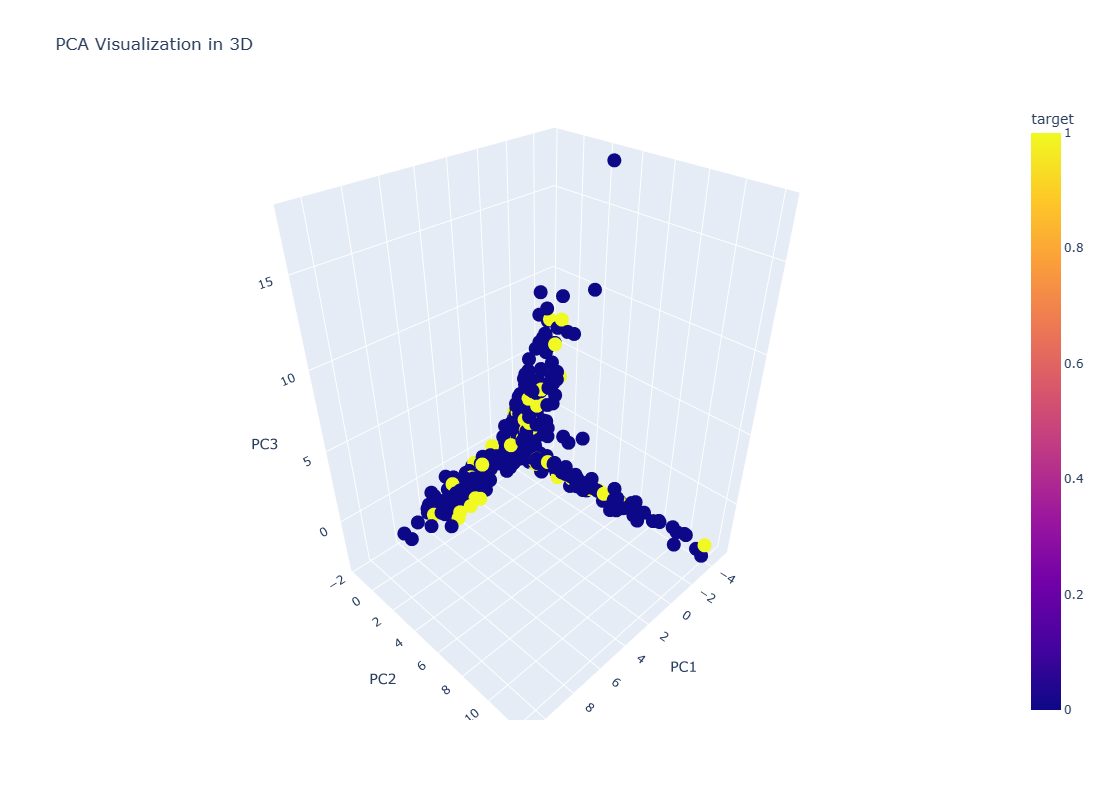

In [175]:
import plotly.express as px
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='target',
                    title='PCA Visualization in 3D')
fig.update_layout(width=1000, height=800)
fig.show()

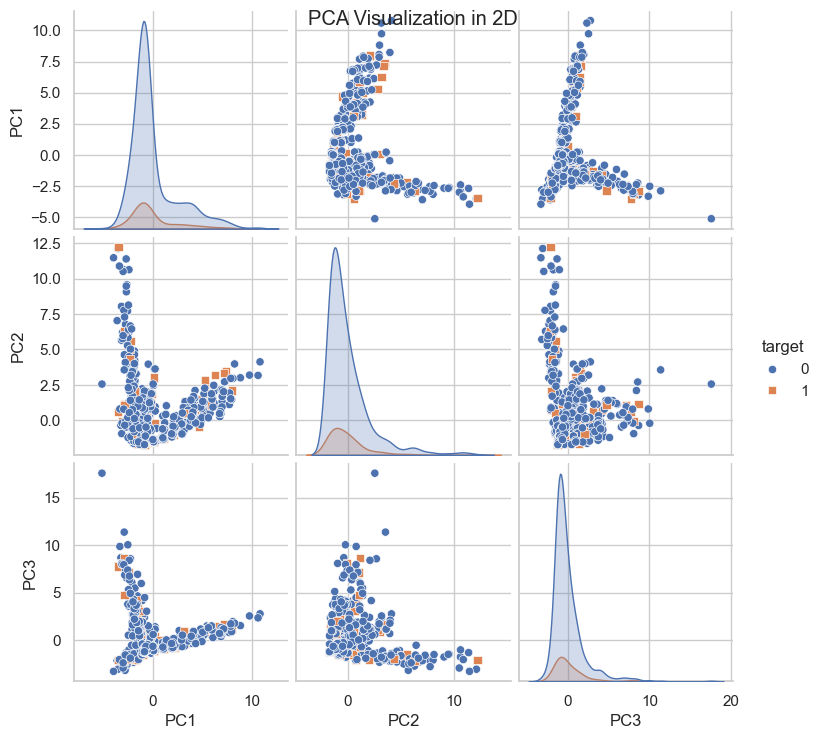

In [176]:
sns.set(style='whitegrid')

# Plotting in principal components in 2D 
sns.pairplot(data=pca_df, hue='target', markers=['o', 's'], diag_kind='kde')
plt.suptitle('PCA Visualization in 2D')
plt.show()

**Comment: Since data is not linearly separable Logistic regression, SVM with kernel as linear will not be a good choice.** 

**C. Upsampling the minority class using SMOTE:**

In [177]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled_cv, y_resampled_cv = smote.fit_resample(X_cv_df, y_target)

**C. Checking for multi-collinearity as it affect the working of many algorithms:**

In [178]:
# Finding all those columns who has correlation >0.75 and printing the details of the same
import pandas as pd

correlation_matrix = X_resampled_cv.corr()

# Finding columns with correlation > 0.80
high_correlation_cols = []
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix[correlation_matrix[col] > 0.80].index.tolist()
    correlated_cols.remove(col)
    if correlated_cols:
        high_correlation_cols.append((col, correlated_cols))

# Printing columns with correlation > 0.80
if high_correlation_cols:
    print("Columns with correlation > 0.80:")
    for col, correlated_cols in high_correlation_cols:
        print(f"{col} is highly correlated with: {', '.join(correlated_cols)}")
else:
    print("No columns have correlation > 0.80")

Columns with correlation > 0.80:
10miz is highly correlated with: 20minz
13 is highly correlated with: ganesh, loopng
13th is highly correlated with: batcj, conatct, followp
14 is highly correlated with: mar
16th is highly correlated with: handson, pilani
17k is highly correlated with: demp, law, sistr
19th is highly correlated with: instiut
1week is highly correlated with: laptop
2018 is highly correlated with: given, januari, recent
20minz is highly correlated with: 10miz
21 is highly correlated with: plcd, vaccat
21st is highly correlated with: whether
22k is highly correlated with: onsat
26th is highly correlated with: bacth
27 is highly correlated with: suprt
27k is highly correlated with: amar, cc, emi, final, follow
29 is highly correlated with: shankar
2member is highly correlated with: discount
30 is highly correlated with: powercut, resid
30min is highly correlated with: aim
31 is highly correlated with: statn, wll
3day is highly correlated with: ion
5di is highly correlated 

In [179]:
import pandas as pd

correlation_matrix = X_resampled_cv.corr()

# Finding columns with correlation > 0.80
correlated_features = set()
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix[correlation_matrix[col] > 0.80].index.tolist()
    correlated_cols.remove(col)
    correlated_features.update(correlated_cols)

total_correlated_features = len(correlated_features)
print("Total number of features correlated with at least one other feature:", total_correlated_features)


Total number of features correlated with at least one other feature: 403


**Cmment: A lot many features are highlycorrelated to each other. We can use PCA technique and select lower number of principla components in order to reduce the multi collinearity.
We can also use Recursive Feature Elimination (RFE) to obtain important feature in order to remove multicollonearity but here it doesnt seems to be a right fit.**

**D. Using PCA technique to tackle the problem of multi-collinearity**

In [180]:
# Since data seems to be standardized already(as it contains the frequency of words) 
# thre is no need to standardize the data. Hence directly applying the PCA

In [181]:
# Working with n_components =750
pca_multi =  PCA(n_components= 750)
X_pca_coll_reduced = pca_multi.fit_transform(X_resampled_cv)

In [182]:
explained_variance_ratio = pca_multi.explained_variance_ratio_
print(explained_variance_ratio)

[2.38401357e-01 1.80308905e-01 1.47422874e-01 8.11014425e-02
 4.22081665e-02 2.99205219e-02 1.57115102e-02 1.42644554e-02
 9.02989177e-03 8.14032980e-03 6.94726445e-03 6.32224531e-03
 5.88033626e-03 5.54439904e-03 5.25146821e-03 4.69910468e-03
 4.46978442e-03 4.26449113e-03 4.19033959e-03 4.08909613e-03
 3.99372235e-03 3.78700751e-03 3.64462269e-03 3.46630536e-03
 3.43620396e-03 3.29055289e-03 3.23746899e-03 2.99048065e-03
 2.90510281e-03 2.84600574e-03 2.76468156e-03 2.67928780e-03
 2.61900228e-03 2.53529715e-03 2.48434833e-03 2.36581400e-03
 2.31806273e-03 2.28076362e-03 2.19387697e-03 2.13076449e-03
 2.06730973e-03 2.02792423e-03 1.99173924e-03 1.97582537e-03
 1.81249335e-03 1.79636358e-03 1.74539010e-03 1.66577495e-03
 1.61731904e-03 1.61099003e-03 1.57063203e-03 1.49890006e-03
 1.44731885e-03 1.38835823e-03 1.37144487e-03 1.34530494e-03
 1.32686886e-03 1.29337921e-03 1.28721166e-03 1.22981722e-03
 1.20928846e-03 1.17520704e-03 1.15675965e-03 1.12669170e-03
 1.10111373e-03 1.079069

In [183]:
# finding the required number of PCA components for work
total_variance = sum(explained_variance_ratio)
cumulative_variance = 0
num_components_to_keep = 0
for i, variance_ratio in enumerate(explained_variance_ratio):
    cumulative_variance += variance_ratio
    if cumulative_variance >= 0.95:  # Adjust as needed
        num_components_to_keep = i+1
        break

print(f"Number of components to keep: {num_components_to_keep}")

Number of components to keep: 118


In [184]:
final_pca = PCA(n_components = num_components_to_keep)
X_pca_coll_reduced_final = final_pca.fit_transform(X_resampled_cv)

In [185]:
pca_multi_df = pd.DataFrame(data=X_pca_coll_reduced_final)
pca_multi_df['target'] = y_resampled_cv

In [186]:
pca_multi_df.head()

0         1         2         3         4         5         6  \
0 -1.200304 -1.133552 -0.303006 -0.450183 -0.196002 -0.881726  0.047936   
1 -1.341056 -0.849897  0.298468 -1.048820 -0.114736 -2.170342  0.760112   
2 -0.788262 -0.830689 -0.656268  0.843160 -0.332041  0.122338 -0.031949   
3 -0.144886 -1.426658 -0.693159 -0.262222 -0.153367  0.358736 -0.073217   
4 -0.915124 -0.486990 -0.182596  0.209390 -0.285677 -1.035197  0.205078   

          7         8         9        10        11        12        13  \
0 -0.214073 -0.010600  0.041277 -0.059758 -0.114257  0.130277  0.145720   
1 -0.225634  0.142910  0.124645  0.758105  0.753460  0.481809 -0.636886   
2 -0.140607 -0.024165  0.143758  0.004631  0.006155  0.014266  0.023287   
3  0.256992  0.331135  0.145178  0.302430 -0.036363  0.179247  0.756567   
4 -0.304743  0.072969  0.008505  0.163183  0.012013  0.155423 -0.014384   

         14        15        16        17        18        19        20  \
0 -0.000337 -0.327214 -0.305892  0.145959  0.029863 -0.162761  0.314441   
1 -0.242134  0.547694 -0.026089 -0.139733  0.051809 -0.752344  0.213523   
2 -0.035279 -0.059677 -0.002306 -0.023471 -0.095029 -0.022418 -0.050063   
3 -0.097304  0.658007  0.367751 -0.413514  0.214887 -0.202151 -0.091680   
4 -0.062316 -0.496651  0.162728 -0.040675 -0.183465 -0.213113  0.242844   

         21        22        23        24        25        26        27  \
0  0.165392 -0.419838  0.270236 -0.203997  0.213690 -0.142338 -0.261356   
1  0.282575 -0.349383 -0.026697  0.529042  0.725117  0.208033 -0.148431   
2 -0.026856  0.010093  0.006324  0.003365  0.003734  0.002175  0.026111   
3  0.159473 -0.071175 -0.032576  0.001039  0.288483 -0.310047 -0.251923   
4  0.289474  0.082997  0.130222 -0.122256  0.030776 -0.034687  0.005196   

         28        29        30        31        32        33        34  \
0  0.138907  0.319652 -0.132686 -0.356309  0.036853  0.066481 -0.211729   
1  0.056548  0.814401 -0.828694  0.227402  0.139557 -0.559410 -0.812100   
2 -0.024153 -0.032894 -0.012279  0.018593 -0.008119  0.016349  0.018480   
3 -0.242692 -0.137583 -0.051642 -0.108624  0.145611  0.245776 -0.331221   
4 -0.017978 -0.152198  0.198209  0.174095 -0.093893 -0.639461 -0.648279   

         35        36        37        38        39        40        41  \
0  0.461433  0.162647  0.192400  0.093068 -0.271076  0.258682  0.596566   
1  0.045993 -0.331733  0.927501 -1.091744 -0.078621 -0.341497 -0.253450   
2  0.028908  0.002742 -0.022998  0.014004  0.008804  0.008484 -0.004559   
3 -0.200715  0.225847 -0.211520 -0.037043  0.127834 -0.078735 -0.011695   
4  0.384128  1.059473  0.287836  0.594337  0.039868 -0.010981 -0.494803   

         42        43        44        45        46        47        48  \
0  0.350048 -0.137635  0.283406  0.227448  0.262268  0.199708  0.209168   
1 -0.706460 -0.451314 -0.492778  0.211653 -0.239709 -0.135969  1.037404   
2  0.026373 -0.001159 -0.019907  0.001975  0.028209  0.004959  0.004584   
3 -0.068317 -0.167211  0.352158 -0.006398  0.073736 -0.194866  0.104858   
4  0.235802 -0.041359 -0.361565  0.422333  0.164570  0.023997  0.298157   

         49        50        51        52        53        54        55  \
0  0.104103 -0.541137  0.360649  0.227996  0.068025 -0.059916  0.487603   
1 -0.224246  0.462480 -0.570921  0.252309  0.058601 -0.361818 -0.278238   
2 -0.020207  0.009114 -0.006563  0.010316  0.001840 -0.014787 -0.017817   
3  0.112418  0.195793 -0.135897 -0.116729 -0.170943  0.082192 -0.101933   
4  0.288633  0.265635  0.020635 -0.257678  0.279331 -0.365719  0.141520   

         56        57        58        59        60        61        62  \
0  0.267366  0.458610  0.241228 -0.315614  0.646499 -0.030516  0.030059   
1 -0.038539 -0.207023 -0.082992  0.505645 -0.345961 -0.355153 -0.090922   
2 -0.015960  0.016009  0.022767  0.008274 -0.010559  0.006071  0.011192   
3 -0.133097  0.049959 -0.061357 -0.046988 -0.042243 -0.081481 -0.044538   
4  0.099001  0.002604  0.14

In [187]:
correlation_matrix = pca_multi_df.drop(columns='target').corr()

# Finding columns with correlation > 0.80
correlated_features = set()
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix[correlation_matrix[col] > 0.80].index.tolist()
    correlated_cols.remove(col)
    correlated_features.update(correlated_cols)

total_correlated_features = len(correlated_features)
print("Total number of features correlated with at least one other feature:", total_correlated_features)

Total number of features correlated with at least one other feature: 0


In [188]:
#splitting the data

X= pca_multi_df.drop(columns= 'target')
y=pca_multi_df['target']
X_train_d,X_test_d,y_train_d,y_test_d = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [189]:
results_cv_df_pca=pd.DataFrame(columns=['name', 'precision', 'recall', 'F1Score', 'accuracy'])
results_cv_df_vanila =pd.DataFrame(columns=['name', 'precision', 'recall', 'F1Score', 'accuracy'])

In [190]:

for name,clf in clfs.items():
    
    accuracy,precision,recall,F1Score = train_classifier(clf, X_train_d,y_train_d,X_test_d,y_test_d)
    results_cv_df_pca.loc[len(results_cv_df_pca)] = [name, precision, recall, F1Score, accuracy]
    
results_cv_df_pca  


name  precision    recall   F1Score  accuracy
0   SVC   0.791667  0.899408  0.842105  0.831361
1    KN   0.598513  0.952663  0.735160  0.656805
2    RF   0.918367  0.798817  0.854430  0.863905
3  GBDT   0.886792  0.834320  0.859756  0.863905
4   xgb   0.905660  0.852071  0.878049  0.881657

**D. Directly using the data obtained after from CountVectorizer WITHOUT transforming data using PCA**

In [191]:
# Splitting The data directly using the X_cv array and y_target

X_train_e,X_test_e,y_train_e,y_test_e = train_test_split(X_resampled_cv,y_resampled_cv,test_size=0.2,stratify=y_resampled_cv,random_state=42)

In [192]:

for name,clf in clfs.items():
    
    accuracy,precision,recall,F1Score = train_classifier(clf, X_train_e,y_train_e,X_test_e,y_test_e)
    results_cv_df_vanila.loc[len(results_cv_df_vanila)] = [name, precision, recall, F1Score, accuracy]
    
results_cv_df_vanila  


name  precision    recall   F1Score  accuracy
0   SVC   0.794872  0.917160  0.851648  0.840237
1    KN   0.557432  0.976331  0.709677  0.600592
2    RF   0.792553  0.881657  0.834734  0.825444
3  GBDT   0.790323  0.869822  0.828169  0.819527
4   xgb   0.790323  0.869822  0.828169  0.819527

In [196]:
merge_data_cv= results_cv_df_vanila.merge(results_cv_df_pca,suffixes=('_vanila','_pca'),left_on='name',right_on='name')
merge_data_cv

name  precision_vanila  recall_vanila  F1Score_vanila  accuracy_vanila  \
0   SVC          0.794872       0.917160        0.851648         0.840237   
1    KN          0.557432       0.976331        0.709677         0.600592   
2    RF          0.792553       0.881657        0.834734         0.825444   
3  GBDT          0.790323       0.869822        0.828169         0.819527   
4   xgb          0.790323       0.869822        0.828169         0.819527   

   precision_pca  recall_pca  F1Score_pca  accuracy_pca  
0       0.791667    0.899408     0.842105      0.831361  
1       0.598513    0.952663     0.735160      0.656805  
2       0.918367    0.798817     0.854430      0.863905  
3       0.886792    0.834320     0.859756      0.863905  
4       0.905660    0.852071     0.878049      0.881657

In [197]:
merge_data_cv.columns

Index(['name', 'precision_vanila', 'recall_vanila', 'F1Score_vanila',
       'accuracy_vanila', 'precision_pca', 'recall_pca', 'F1Score_pca',
       'accuracy_pca'],
      dtype='object')

**Comment:** 
- There is decrease in recall in pca transformed data and in some algorithm there is even a decrease in accuracy.
- Based on the above table we can opt for XGB algorithm with PCA transformation 

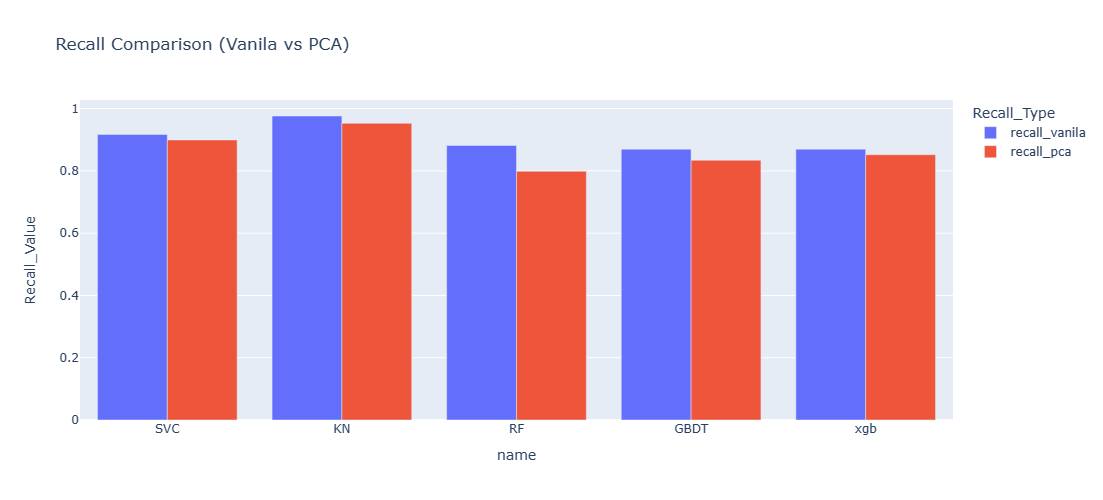

In [218]:
import plotly.express as px

data = merge_data_cv[['name','recall_vanila','recall_pca']]
df_1 = pd.DataFrame(data)

df_melted = df_1.melt(id_vars='name', var_name='Recall_Type', value_name='Recall_Value')
df_melted

fig = px.bar(df_melted, x='name', y='Recall_Value', color='Recall_Type',
             barmode='group', title='Recall Comparison (Vanila vs PCA)',
            height=500, width=800)

fig.show()


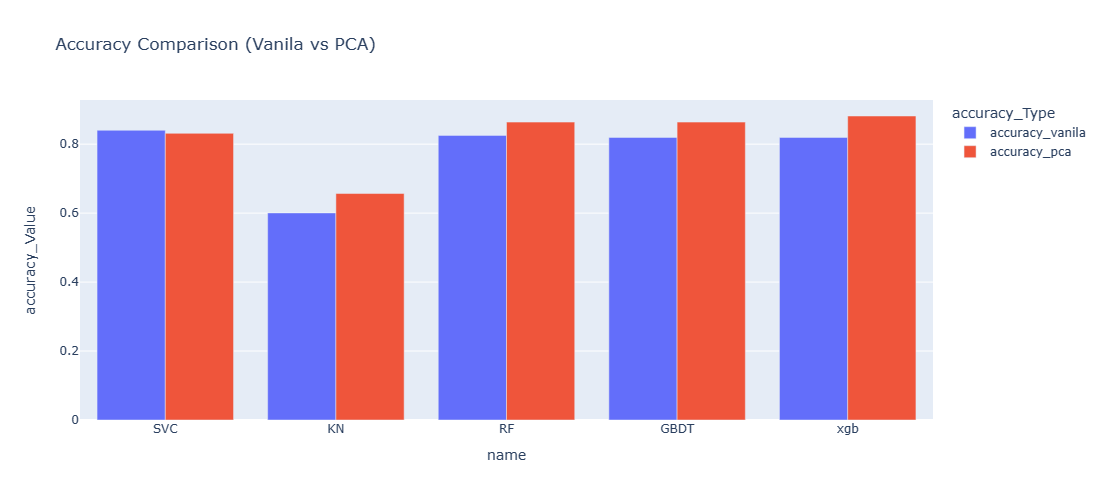

In [219]:
data = merge_data_cv[['name','accuracy_vanila','accuracy_pca']]
df_2 = pd.DataFrame(data)

df_melted = df_2.melt(id_vars='name', var_name='accuracy_Type', value_name='accuracy_Value')
df_melted

fig = px.bar(df_melted, x='name', y='accuracy_Value', color='accuracy_Type',
             barmode='group', title='Accuracy Comparison (Vanila vs PCA)',
            height=500, width=800)

fig.show()

**Although Naive Bayes perfoms well with NLP datasets but since we have transformed the data using PCA we have obtaine negative values hence Naive bayes is not applicable.** 
Also, the object of Count Vectorizer we have kept 'binary' hyperparameter as False, the output  we will get is frequency of how many times a certain word or combination of words(depending on ngrams) hence multinomial naive bayes would be a beteer choice if didnt transform the data else bernoulli Naive Bayes would be a better choice.

**E. Altering ngram hyperparameter to see if the performance impoves**

In [265]:
# For plain data obtained using countvectorizer and then upsampling the minority class

for i in range(2,6):
    cv2 = CountVectorizer(ngram_range=(1,i))
    X_cv2 = cv2.fit_transform(df['transformed_text']).toarray()
    X_cv2_df = pd.DataFrame(X_cv2)

    print("n_gram value: ",i)
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled_cv2, y_resampled_cv2 = smote.fit_resample(X_cv2_df, y_target)
    
    from sklearn.model_selection import train_test_split
    X_train_a2,X_test_a2,y_train,y_test = train_test_split(X_resampled_cv2,y_resampled_cv2,test_size=0.2,stratify=y_resampled_cv2,random_state=42)
    accuracy_scores_2 = []
    precision_scores_2 = []
    recall_scores_2 = []
    F1_scores_2 =[]

    for name,clf in clfs.items():
    
        current_accuracy_2,current_precision_2,current_recall_2,current_F1Score_2 = train_classifier(clf, X_train_a2,y_train,X_test_a2,y_test)
        accuracy_scores_2.append(current_accuracy_2)
        precision_scores_2.append(current_precision_2)
        recall_scores_2.append(current_recall_2)
        F1_scores_2.append(current_F1Score_2)
    
    accuracy_df_arr2=pd.DataFrame({'Algorthms': clfs.keys(), 'Accuracy':accuracy_scores_2, 'precision_scores':precision_scores_2,"Recall_Scores":recall_scores_2,"F1_Score":F1_scores_2}).sort_values(['Recall_Scores',"F1_Score",'Accuracy'],ascending=False)
    
    display(accuracy_df_arr2)
    print('*'*100)
        

n_gram value:  2


Algorthms  Accuracy  precision_scores  Recall_Scores  F1_Score
1        KN  0.565089          0.536184       0.964497  0.689218
0       SVC  0.855030          0.833333       0.887574  0.859599
2        RF  0.819527          0.793478       0.863905  0.827195
4       xgb  0.837278          0.827586       0.852071  0.839650
3      GBDT  0.798817          0.775956       0.840237  0.806818

****************************************************************************************************
n_gram value:  3


Algorthms  Accuracy  precision_scores  Recall_Scores  F1_Score
1        KN  0.535503          0.519108       0.964497  0.674948
2        RF  0.816568          0.774359       0.893491  0.829670
0       SVC  0.855030          0.833333       0.887574  0.859599
4       xgb  0.834320          0.819209       0.857988  0.838150
3      GBDT  0.798817          0.767196       0.857988  0.810056

****************************************************************************************************
n_gram value:  4


Algorthms  Accuracy  precision_scores  Recall_Scores  F1_Score
1        KN  0.532544          0.517028       0.988166  0.678862
2        RF  0.804734          0.758794       0.893491  0.820652
0       SVC  0.855030          0.833333       0.887574  0.859599
3      GBDT  0.810651          0.783784       0.857988  0.819209
4       xgb  0.831361          0.833333       0.828402  0.830861

****************************************************************************************************
n_gram value:  5


Algorthms  Accuracy  precision_scores  Recall_Scores  F1_Score
1        KN  0.535503          0.518634       0.988166  0.680244
0       SVC  0.857988          0.834254       0.893491  0.862857
2        RF  0.792899          0.751269       0.875740  0.808743
3      GBDT  0.807692          0.785714       0.846154  0.814815
4       xgb  0.825444          0.819767       0.834320  0.826979

****************************************************************************************************


**Comment: No major change observed in the metrics with change in ngram , although some minor changes were there.**

### <u>USING TF-IDF</u>

In [301]:
tfidf = TfidfVectorizer(max_df=0.8,use_idf=True)

In [302]:
X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()
X_tfidf

array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.163128, 0.      , 0.      ]])

In [303]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled_tfidf, y_resampled_tfidf = smote.fit_resample(X_tfidf, y_target)

In [304]:
from sklearn.model_selection import train_test_split
X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(X_resampled_tfidf,y_resampled_tfidf,test_size=0.2,stratify=y_resampled_tfidf,random_state=42)

In [305]:
print(y_test_tfidf.shape)
print(y_train_tfidf.shape)
print(X_test_tfidf.shape)
print(X_train_tfidf.shape)

(338,)
(1352,)
(338, 1087)
(1352, 1087)


In [306]:
results_tfidf_df_vanila=pd.DataFrame(columns=['name', 'precision', 'recall', 'F1Score', 'accuracy'])

In [307]:
for name,clf in clfs.items():
    
    accuracy,precision,recall,F1Score = train_classifier(clf, X_train_tfidf,y_train_tfidf,X_test_tfidf,y_test_tfidf)
    results_tfidf_df_vanila.loc[len(results_tfidf_df_vanila)] = [name, precision, recall, F1Score, accuracy]
    
results_tfidf_df_vanila  


name  precision    recall   F1Score  accuracy
0   SVC   0.946746  0.946746  0.946746  0.946746
1    KN   0.592857  0.982249  0.739421  0.653846
2    RF   0.950311  0.905325  0.927273  0.928994
3  GBDT   0.877301  0.846154  0.861446  0.863905
4   xgb   0.926380  0.893491  0.909639  0.911243

In [298]:
results_tfidf_df_vanila.columns

Index(['name', 'precision', 'recall', 'F1Score', 'accuracy'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

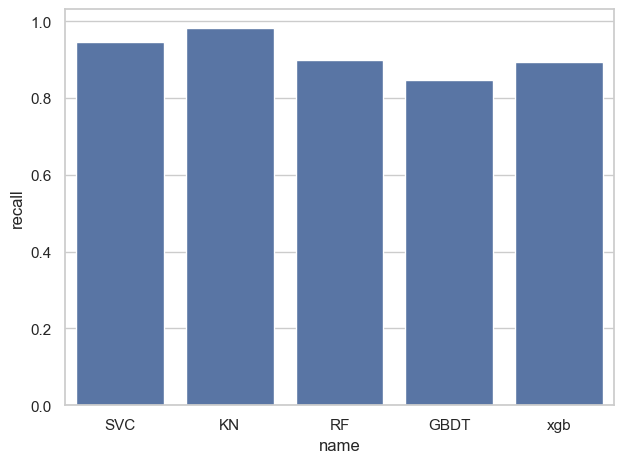

In [299]:
data= results_tfidf_df_vanila[['name','recall' ]]
sns.barplot(data= data,x='name',y='recall')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

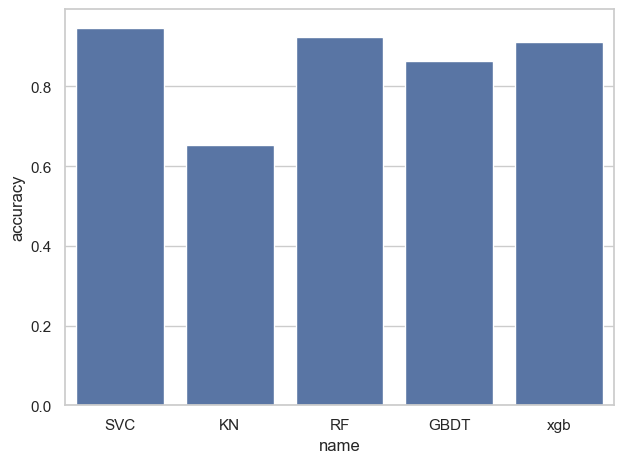

In [300]:
data= results_tfidf_df_vanila[['name','accuracy' ]]
sns.barplot(data= data,x='name',y='accuracy')
plt.tight_layout()
plt.show

**Comment: SVC has performed extremely well.**

**ALtering the ngram_range hyperparameter**

In [273]:
for i in range(2,6):
    tfidf2 = TfidfVectorizer(ngram_range=(1,i))
    X_tfidf2 = tfidf2.fit_transform(df['transformed_text']).toarray()
    X_tfidf2_df = pd.DataFrame(X_tfidf2)

    print("n_gram value: ",i)
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled_tfidf2, y_resampled_tfidf2 = smote.fit_resample(X_tfidf2_df, y_target)
    
    from sklearn.model_selection import train_test_split
    X_train_tf,X_test_tf,y_train_tf,y_test_tf = train_test_split(X_resampled_tfidf2, y_resampled_tfidf2,test_size=0.2,stratify=y_resampled_cv2,random_state=42)
    accuracy_scores_2 = []
    precision_scores_2 = []
    recall_scores_2 = []
    F1_scores_2 =[]

    for name,clf in clfs.items():
    
        current_accuracy_2,current_precision_2,current_recall_2,current_F1Score_2 = train_classifier(clf, X_train_tf,y_train_tf,X_test_tf,y_test_tf)
        accuracy_scores_2.append(current_accuracy_2)
        precision_scores_2.append(current_precision_2)
        recall_scores_2.append(current_recall_2)
        F1_scores_2.append(current_F1Score_2)
    
    accuracy_df_arr2=pd.DataFrame({'Algorthms': clfs.keys(), 'Accuracy':accuracy_scores_2, 'precision_scores':precision_scores_2,"Recall_Scores":recall_scores_2,"F1_Score":F1_scores_2}).sort_values(['Recall_Scores',"F1_Score",'Accuracy'],ascending=False)
    
    display(accuracy_df_arr2)
    print('*'*100)

n_gram value:  2


Algorthms  Accuracy  precision_scores  Recall_Scores  F1_Score
1        KN  0.568047          0.538462       0.952663  0.688034
0       SVC  0.970414          0.993789       0.946746  0.969697
2        RF  0.961538          0.993671       0.928994  0.960245
4       xgb  0.928994          0.950311       0.905325  0.927273
3      GBDT  0.872781          0.909091       0.828402  0.866873

****************************************************************************************************
n_gram value:  3


Algorthms  Accuracy  precision_scores  Recall_Scores  F1_Score
1        KN  0.550296          0.527331       0.970414  0.683333
0       SVC  0.958580          0.981366       0.934911  0.957576
2        RF  0.949704          0.993506       0.905325  0.947368
4       xgb  0.926036          0.961538       0.887574  0.923077
3      GBDT  0.866864          0.907895       0.816568  0.859813

****************************************************************************************************
n_gram value:  4


Algorthms  Accuracy  precision_scores  Recall_Scores  F1_Score
1        KN  0.535503          0.518987       0.970414  0.676289
0       SVC  0.958580          0.981366       0.934911  0.957576
2        RF  0.934911          0.974194       0.893491  0.932099
4       xgb  0.914201          0.966667       0.857988  0.909091
3      GBDT  0.875740          0.926174       0.816568  0.867925

****************************************************************************************************
n_gram value:  5


Algorthms  Accuracy  precision_scores  Recall_Scores  F1_Score
1        KN  0.523669          0.512422       0.976331  0.672098
0       SVC  0.958580          0.981366       0.934911  0.957576
2        RF  0.946746          0.987097       0.905325  0.944444
4       xgb  0.896450          0.935065       0.852071  0.891641
3      GBDT  0.857988          0.935252       0.769231  0.844156

****************************************************************************************************


**<u>Tuning Random Forest Hyper-parameters</u>**

In [282]:
from sklearn.metrics import recall_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from bayes_opt import BayesianOptimization


def rf_objective(n_estimators, max_depth, min_samples_split, min_impurity_decrease):
    # Convert hyperparameters to integer or discrete values if necessary
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_impurity_decrease = float(min_impurity_decrease)
    
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                min_impurity_decrease=min_impurity_decrease,
                                max_depth=max_depth, 
                                min_samples_split=min_samples_split,
                                criterion='gini', 
                                max_features='sqrt')
    
    scores = cross_val_score(rf, X_train_tf, y_train_tf, cv=3, scoring=custom_scorer)
    return scores.mean()

param_bounds = {'n_estimators': (10, 200),
                'max_depth': (8, 32),
                'min_samples_split': (2, 15),
                'min_impurity_decrease': (0.01, 0.1)}

# Performing Bayesian optimization
optimizer = BayesianOptimization(f=rf_objective, pbounds=param_bounds)
optimizer.maximize(n_iter=10, init_points=5)


best_params = optimizer.max['params']
best_score = optimizer.max['target']
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

|   iter    |  target   | max_depth | min_im... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.763     | 18.53     | 0.01903   | 6.085     | 37.78     |
| 2         | 0.0       | 14.86     | 0.09998   | 4.659     | 134.0     |
| 3         | 0.5832    | 27.19     | 0.05994   | 8.35      | 121.5     |
| 4         | 0.2916    | 20.12     | 0.07474   | 6.551     | 72.85     |
| 5         | 0.2916    | 30.84     | 0.09497   | 4.212     | 196.9     |
| 6         | 0.7149    | 16.15     | 0.02232   | 9.417     | 177.7     |
| 7         | 0.2916    | 13.74     | 0.05672   | 2.92      | 133.4     |
| 8         | 0.749     | 19.04     | 0.02065   | 7.41      | 36.18     |
| 9         | 0.5081    | 15.1      | 0.01307   | 7.269     | 36.53     |
| 10        | 0.7014    | 22.09     | 0.02582   | 6.026     | 37.69     |
| 11        | 0.5256    | 19.73     | 0.01598   | 3.228     | 34.76     |
| 12        | 0.2918    | 20.95     | 

In [283]:
# metrics value using the above obtained hyperparameters:
rf_tfidf_bayesian = RandomForestClassifier(max_depth = 18, min_impurity_decrease= 0.01903165412242786, min_samples_split= 6, n_estimators= 37)

rf_tfidf_bayesian.fit(X_train_tfidf,y_train_tfidf)
y_pred = rf_tfidf_bayesian.predict(X_test_tfidf)

precision= precision_score(y_test_tfidf,y_pred)
recall= recall_score(y_test_tfidf,y_pred)
accuracy = accuracy_score(y_test_tfidf,y_pred)
f1 = f1_score(y_test_tfidf,y_pred)

df_rf_tfidf_bayesian = pd.DataFrame({'precision':[precision],'recall':[recall],'accuracy':[accuracy],'f1':[f1]})
df_rf_tfidf_bayesian

precision    recall  accuracy        f1
0   0.582979  0.810651  0.615385  0.678218

**Comment:  The results obtained after using the hyperparameter value is worse than the one obtained using default values.**

In [ ]:
# manually finding the optimum hyperparamter values.

In [284]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['sqrt', 'log2', None]
grid = dict(criterion=criterion,max_features = max_features)
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=3, scoring='accuracy',n_jobs=-1)
grid_result_rf = grid_search_rf.fit(X_train_tfidf,y_train_tfidf)
print("Best: %f using %s" % (grid_result_rf.best_score_, grid_result_rf.best_params_))

Best: 0.915680 using {'criterion': 'entropy', 'max_features': 'log2'}


Max Acc obtained at n_estimators = 90, Accuracy = 0.9408284023668639


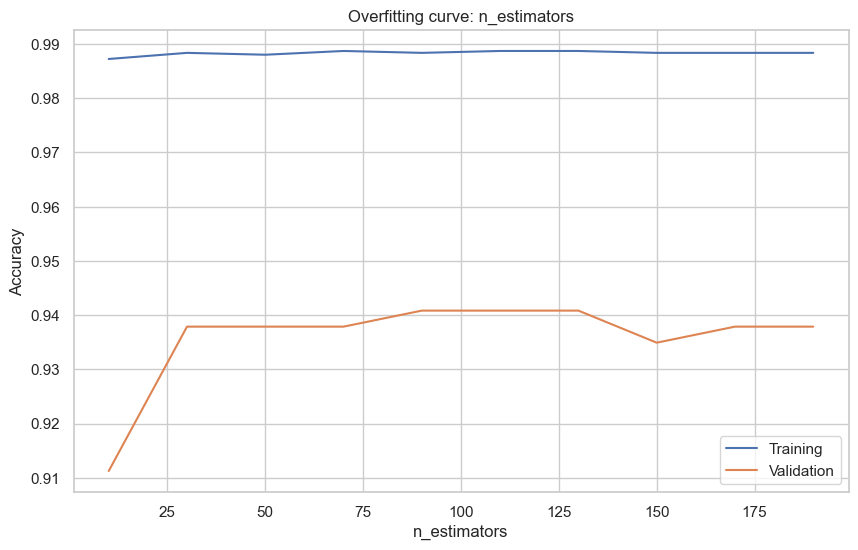

In [293]:

def test_params(**params):
    model = RandomForestClassifier(random_state=42,criterion= 'entropy', max_features= 'log2', **params)
    model.fit(X_train_tfidf,y_train_tfidf)
    train_score = 0.25*accuracy_score(model.predict(X_train_tfidf), y_train_tfidf)+0.5*recall_score(model.predict(X_train_tfidf), y_train_tfidf)+ 0.25*precision_score(model.predict(X_train_tfidf), y_train_tfidf)
    val_score = accuracy_score(model.predict(X_test_tfidf), y_test_tfidf)
    return train_score, val_score

def test_param_and_plot(param_name, param_values):
    train_acc, val_acc = [], []
    best_param_value = None  
    max_val_acc = 0.0  
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_acc.append(train_score)
        val_acc.append(val_score)
        
        if val_score > max_val_acc:
            max_val_acc = val_score
            best_param_value = value
    
    plt.figure(figsize=(10, 6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc)
    plt.plot(param_values, val_acc)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    print(f"Max Acc obtained at {param_name} = {best_param_value}, Accuracy = {max_val_acc}")
n_values = [10,30,50,70,90,110,130,150,170,190]
test_param_and_plot('n_estimators', n_values)

Max Acc obtained at max_depth = 28, Accuracy = 0.9142011834319527


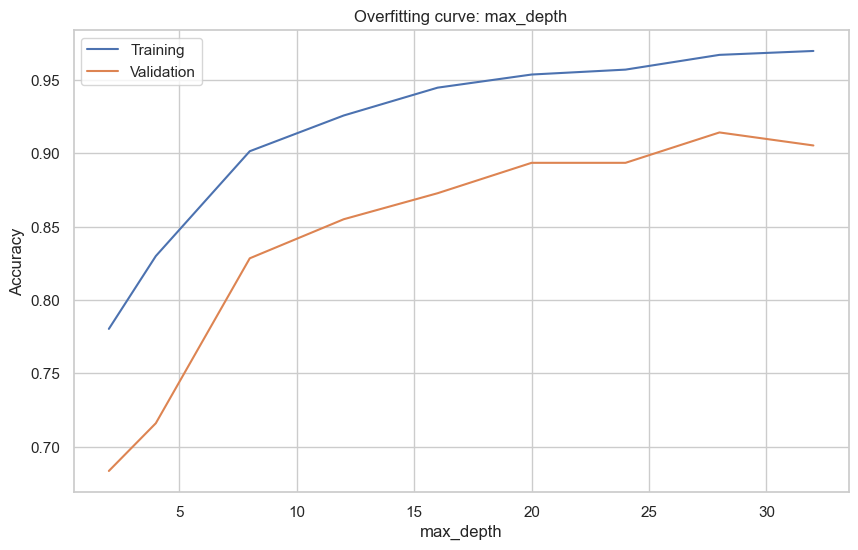

In [294]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42,criterion= 'entropy', max_features= 'log2',n_estimators = 90, **params)
    model.fit(X_train_tfidf,y_train_tfidf)
    train_score = 0.25*accuracy_score(model.predict(X_train_tfidf), y_train_tfidf)+0.5*recall_score(model.predict(X_train_tfidf), y_train_tfidf)+ 0.25*precision_score(model.predict(X_train_tfidf), y_train_tfidf)
    val_score = accuracy_score(model.predict(X_test_tfidf), y_test_tfidf)
    return train_score, val_score

def test_param_and_plot(param_name, param_values):
    train_acc, val_acc = [], []
    best_param_value = None  
    max_val_acc = 0.0  
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_acc.append(train_score)
        val_acc.append(val_score)
        
        if val_score > max_val_acc:
            max_val_acc = val_score
            best_param_value = value
    
    plt.figure(figsize=(10, 6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc)
    plt.plot(param_values, val_acc)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    print(f"Max Acc obtained at {param_name} = {best_param_value}, Accuracy = {max_val_acc}")
    
d_values = [2,4,8,12,16,20,24,28,32]
test_param_and_plot('max_depth', d_values)

Max Acc obtained at min_samples_split = 4, Accuracy = 0.908284023668639


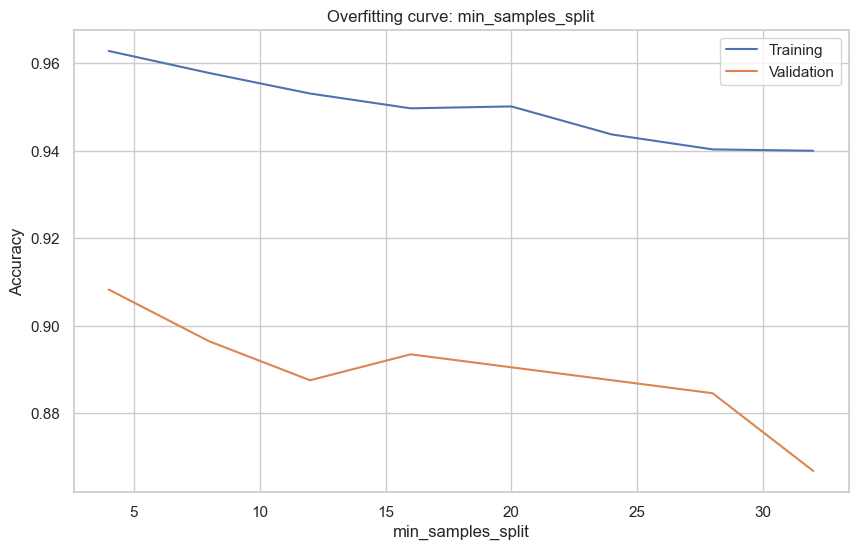

In [292]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42,criterion= 'entropy', max_features= 'log2',n_estimators = 90,max_depth = 28 ,**params)
    model.fit(X_train_tfidf,y_train_tfidf)
    train_score = 0.25*accuracy_score(model.predict(X_train_tfidf), y_train_tfidf)+0.5*recall_score(model.predict(X_train_tfidf), y_train_tfidf)+ 0.25*precision_score(model.predict(X_train_tfidf), y_train_tfidf)
    val_score = accuracy_score(model.predict(X_test_tfidf), y_test_tfidf)
    return train_score, val_score

def test_param_and_plot(param_name, param_values):
    train_acc, val_acc = [], []
    best_param_value = None  
    max_val_acc = 0.0  
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_acc.append(train_score)
        val_acc.append(val_score)
        
        if val_score > max_val_acc:
            max_val_acc = val_score
            best_param_value = value
    
    plt.figure(figsize=(10, 6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc)
    plt.plot(param_values, val_acc)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    print(f"Max Acc obtained at {param_name} = {best_param_value}, Accuracy = {max_val_acc}")

split_values = [4,8,12,16,20,24,28,32]
test_param_and_plot('min_samples_split', split_values)

Max Acc obtained at min_impurity_decrease = 0.001, Accuracy = 0.8668639053254438


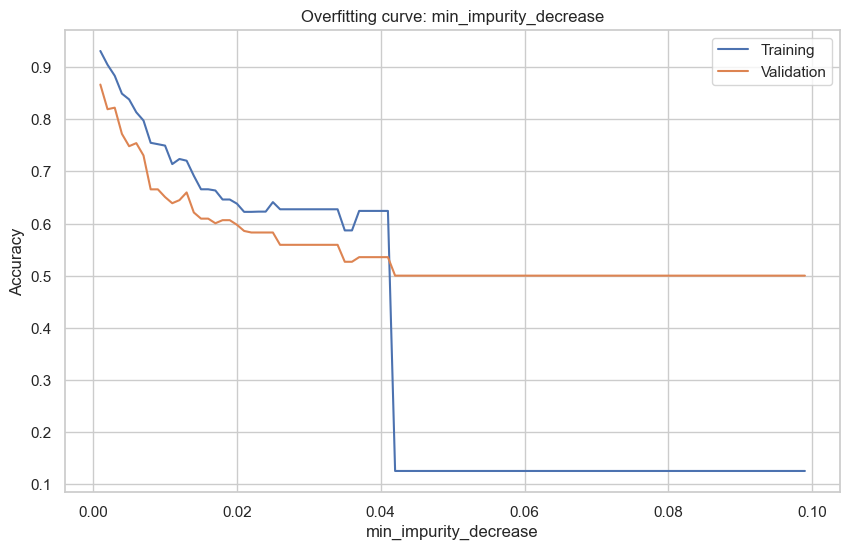

In [295]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42,criterion= 'entropy', max_features= 'log2',n_estimators = 90,max_depth = 28 ,min_samples_split = 4,**params)
    model.fit(X_train_tfidf,y_train_tfidf)
    train_score = 0.25*accuracy_score(model.predict(X_train_tfidf), y_train_tfidf)+0.5*recall_score(model.predict(X_train_tfidf), y_train_tfidf)+ 0.25*precision_score(model.predict(X_train_tfidf), y_train_tfidf)
    val_score = accuracy_score(model.predict(X_test_tfidf), y_test_tfidf)
    return train_score, val_score

def test_param_and_plot(param_name, param_values):
    train_acc, val_acc = [], []
    best_param_value = None  
    max_val_acc = 0.0  
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_acc.append(train_score)
        val_acc.append(val_score)
        
        if val_score > max_val_acc:
            max_val_acc = val_score
            best_param_value = value
    
    plt.figure(figsize=(10, 6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc)
    plt.plot(param_values, val_acc)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    print(f"Max Acc obtained at {param_name} = {best_param_value}, Accuracy = {max_val_acc}")

min_impurity_decrease=[i/1000 for i in range(1,100)]
test_param_and_plot('min_impurity_decrease',min_impurity_decrease)

In [297]:
rf_tfidf_tuned = RandomForestClassifier(random_state=42,criterion= 'entropy', max_features= 'log2',n_estimators = 90,max_depth = 28 ,min_samples_split = 4,min_impurity_decrease = 0.001)

rf_tfidf_tuned.fit(X_train_tfidf,y_train_tfidf)
y_pred = rf_tfidf_tuned.predict(X_test_tfidf)

precision= precision_score(y_test_tfidf,y_pred)
recall= recall_score(y_test_tfidf,y_pred)
accuracy = accuracy_score(y_test_tfidf,y_pred)
f1 = f1_score(y_test_tfidf,y_pred)

df_rf_tfidf_tuned = pd.DataFrame({'precision':[precision],'recall':[recall],'accuracy':[accuracy],'f1':[f1]})
df_rf_tfidf_tuned

precision    recall  accuracy        f1
0   0.924658  0.798817  0.866864  0.857143

**Comment: SVC with default parameters is still giving better results than the tuned one.**

## <u>Results Compilation</u>

In [274]:
results_cv_df_vanila

name  precision    recall   F1Score  accuracy
0   SVC   0.794872  0.917160  0.851648  0.840237
1    KN   0.557432  0.976331  0.709677  0.600592
2    RF   0.792553  0.881657  0.834734  0.825444
3  GBDT   0.790323  0.869822  0.828169  0.819527
4   xgb   0.790323  0.869822  0.828169  0.819527

In [275]:
results_cv_df_pca

name  precision    recall   F1Score  accuracy
0   SVC   0.791667  0.899408  0.842105  0.831361
1    KN   0.598513  0.952663  0.735160  0.656805
2    RF   0.918367  0.798817  0.854430  0.863905
3  GBDT   0.886792  0.834320  0.859756  0.863905
4   xgb   0.905660  0.852071  0.878049  0.881657

In [276]:
# word2vec results
results_df

Name  Precision    Recall  F1_score  Accuracy
0    SVC_word2_vec_tuned   0.550000  0.846154  0.646154  0.576923
1  SVC_word2_vec_default   0.333333  0.115385  0.171429  0.442308
2          Xgboost_tuned   0.851852  0.952663  0.899441  0.893491
3        Xgboost_default   0.837696  0.946746  0.888889  0.881657

In [277]:
result_basci_w2vec_df

Algorithm  Accuracy  Precision    Recall  F1_Score
0       SVC  0.538462   0.548148  0.437870  0.486842
1        KN  0.754438   0.685345  0.940828  0.793017
2        RF  0.872781   0.838710  0.923077  0.878873
3      GBDT  0.813609   0.776042  0.881657  0.825485
4       xgb  0.881657   0.837696  0.946746  0.888889

In [278]:
results_tfidf_df_vanila

name  precision    recall   F1Score  accuracy
0   SVC   0.946746  0.946746  0.946746  0.946746
1    KN   0.592857  0.982249  0.739421  0.653846
2    RF   0.944099  0.899408  0.921212  0.923077
3  GBDT   0.877301  0.846154  0.861446  0.863905
4   xgb   0.926380  0.893491  0.909639  0.911243

**<u>Final verdict:SVC with tfidf and default hyperparameter values has given the best result.</u>**

In [ ]:
Dear Kanth/Shubham
Please add you comments here what extra I could have done which I didnd do or any other suggestion by which I could improve the model performance.